In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.metrics.pairwise import euclidean_distances
import ipywidgets as widgets
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt



# Upload and Clean Data

In [ ]:
def convert(height):
  '''
  Convert the height in the dataframe from Feet-Inches format to inches

  Parameters
  ---------
  height str
    height in feet-inches format

  Returns
  --------
  float
    height in inches
  '''
  height = str(height)
  if '-' in height:
    li = height.split('-')
    if len(li) == 2:
      ft = int(li[0]) * 12
      inc = int(li[1])
      h = ft + inc
  else:
    h= 0
  return float(h)

In [ ]:
#upload and clean data
#nfl combine data, 2010-2023
combine = pd.read_csv('nfl_combine.csv')
#filter to only include players who were drafted
combine = combine[combine["Drafted"] == True]
combine.reset_index(inplace=True)
combine.drop(columns=['index'], inplace=True)
#change height to inches
combine['Height'] = combine['Height'].apply(convert)
#combine player info with player performance
performance = pd.read_csv('yearly_player_data.csv')
cols = [
    "player_name", "season","draft_year", "draft_round", "draft_pick", "draft_ovr", "college", "height", "weight", "age",
    "team", "player_id", "position",
    "pass_attempts", "complete_pass", "passing_yards", "pass_td", "interception",
    "comp_pct", "int_pct", "pass_td_pct", "ypa", "pass_ypg", "passer_rating",
    "targets", "receptions", "receiving_yards", "reception_td", "rec_ypg",
    "rec_td_pct", "yards_after_catch", "yptarget", "ypr",
    "rush_attempts", "rushing_yards", "run_td", "rush_ypg", "rush_td_pct", "ypc",
]
performance = performance[cols]

#aggregate over the players season, in order to get one average value for each stat
non_numeric_cols = ['player_name', 'college']
numeric_cols = performance.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('season')
avg_performance = performance.groupby('player_name').agg({col: 'first' for col in non_numeric_cols})
avg_performance[numeric_cols] = performance.groupby('player_name')[numeric_cols].mean()
avg_performance.drop(columns=['player_name'], inplace=True)
avg_performance.reset_index(inplace=True)
avg_performance["draft_round"] = avg_performance["draft_round"].astype(int)

display(combine.head())
display(avg_performance.head())
print(avg_performance.columns)


,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Round,Pick
0,2010,Nate Allen,S,South Florida,72.0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,True,2.0,37.0
1,2010,Tyson Alualu,DE,California,74.0,295.0,4.87,35.5,21.0,116.0,7.15,4.43,True,1.0,10.0
2,2010,Pat Angerer,ILB,Iowa,72.0,235.0,4.71,35.0,26.0,110.0,7.04,4.29,True,2.0,63.0
3,2010,Javier Arenas,CB,Alabama,69.0,197.0,4.60,NaN,NaN,112.0,NaN,NaN,True,2.0,50.0
4,2010,Jon Asamoah,OG,Illinois,76.0,305.0,5.07,NaN,NaN,NaN,NaN,NaN,True,3.0,68.0


,player_name,college,draft_year,draft_round,draft_pick,draft_ovr,height,weight,age,pass_attempts,...,rec_td_pct,yards_after_catch,yptarget,ypr,rush_attempts,rushing_yards,run_td,rush_ypg,rush_td_pct,ypc
0,A.J. Brown,Mississippi,2019.0,2,19.0,51.0,73.0,226.0,24.0,0.4,...,0.078000,431.400000,10.094000,16.0200,1.000000,14.000000,0.2,0.9040,0.06660,5.000000
1,A.J. Derby,Arkansas,2015.0,6,26.0,202.0,77.0,240.0,26.0,0.0,...,0.083333,50.333333,7.900000,12.5400,0.000000,0.000000,0.0,0.0000,0.00000,0.000000
2,A.J. Dillon,Boston College,2020.0,2,30.0,62.0,72.0,247.0,23.5,0.0,...,0.013500,190.000000,7.927500,9.3025,149.250000,607.000000,4.0,40.0725,0.02975,4.282500
3,A.J. Green,Georgia,2011.0,1,4.0,4.0,76.0,210.0,28.8,0.0,...,0.056300,247.000000,8.018000,13.9570,0.600000,4.000000,0.0,0.2550,0.00000,1.050000
4,A.J. Jenkins,Illinois,2012.0,1,30.0,30.0,73.0,195.0,23.0,0.0,...,0.000000,29.000000,4.616667,8.8600,1.333333,1.333333,0.0,0.1900,0.00000,0.666667


Index(['player_name', 'college', 'draft_year', 'draft_round', 'draft_pick',
       'draft_ovr', 'height', 'weight', 'age', 'pass_attempts',
       'complete_pass', 'passing_yards', 'pass_td', 'interception', 'comp_pct',
       'int_pct', 'pass_td_pct', 'ypa', 'pass_ypg', 'passer_rating', 'targets',
       'receptions', 'receiving_yards', 'reception_td', 'rec_ypg',
       'rec_td_pct', 'yards_after_catch', 'yptarget', 'ypr', 'rush_attempts',
       'rushing_yards', 'run_td', 'rush_ypg', 'rush_td_pct', 'ypc'],
      dtype='object')


In [ ]:
#filter datasets for players in both datasets
overlapping_players = combine["Player"].isin(avg_performance["player_name"])
combine = combine[combine["Player"].isin(avg_performance["player_name"])]
avg_performance = avg_performance[avg_performance["player_name"].isin(combine["Player"])]
#drop duplicates
combine = combine.drop_duplicates(subset="Player")
avg_performance = avg_performance.drop_duplicates(subset="player_name")
#add position to avg performance dataset
avg_performance["Pos"] = avg_performance["player_name"].map(combine.set_index("Player")["Pos"])


# Initial Data Exploration

### Combine Data Exploration

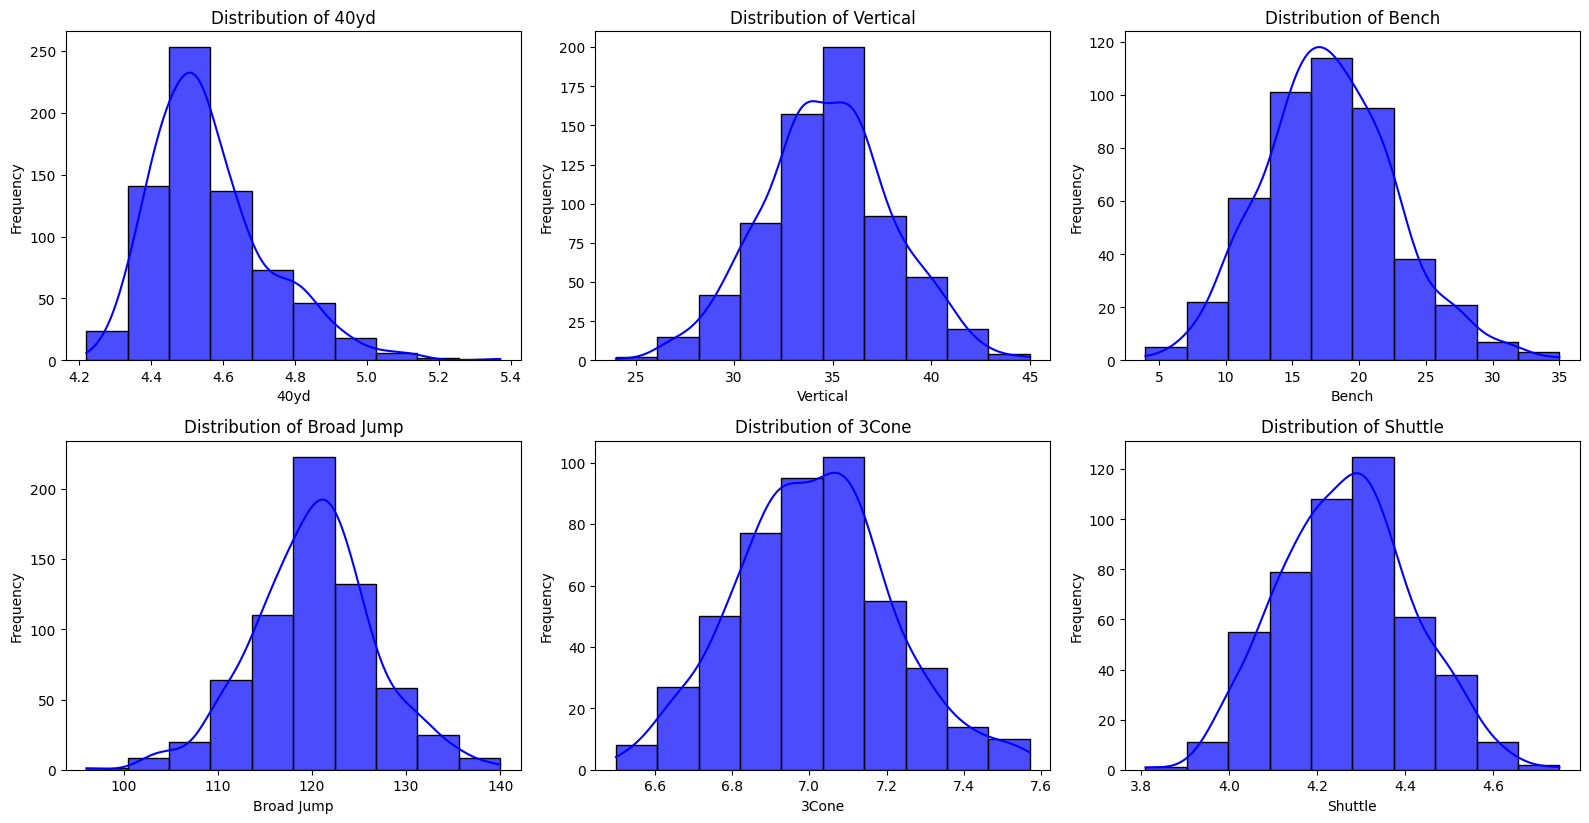

In [ ]:
#distribution of combine events
stats_to_visualize = ['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
plt.figure(figsize=(16, 12))
for i, stat in enumerate(stats_to_visualize, 1):
    plt.subplot(3, 3, i)
    #skip NA values, means player didnt complete event, dont want an input 0 to create issue with averages
    sns.histplot(combine[stat].dropna(), kde=True, bins=10, color='blue', alpha=0.7)
    plt.title(f'Distribution of {stat}', fontsize=12)
    plt.xlabel(stat, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()


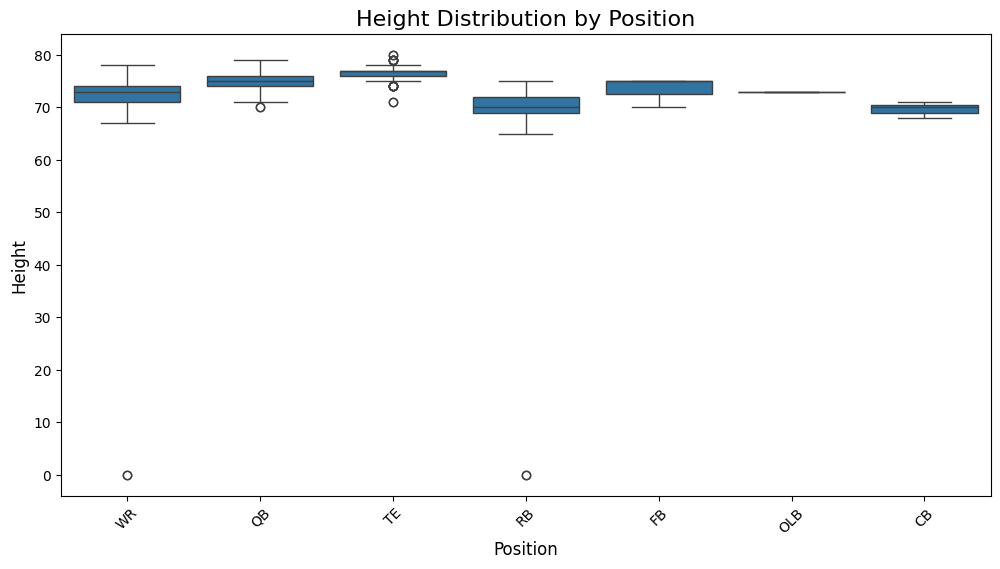

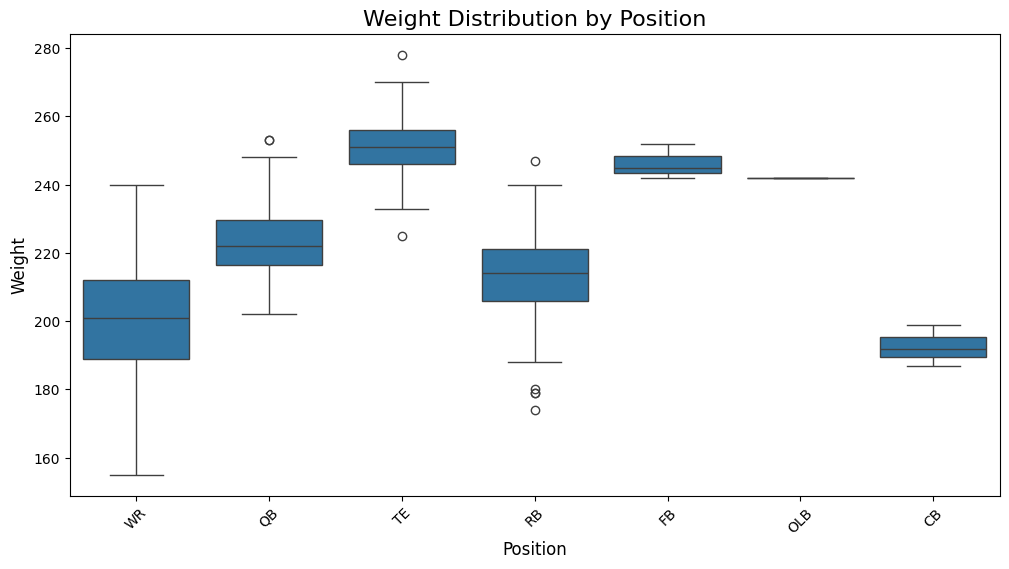

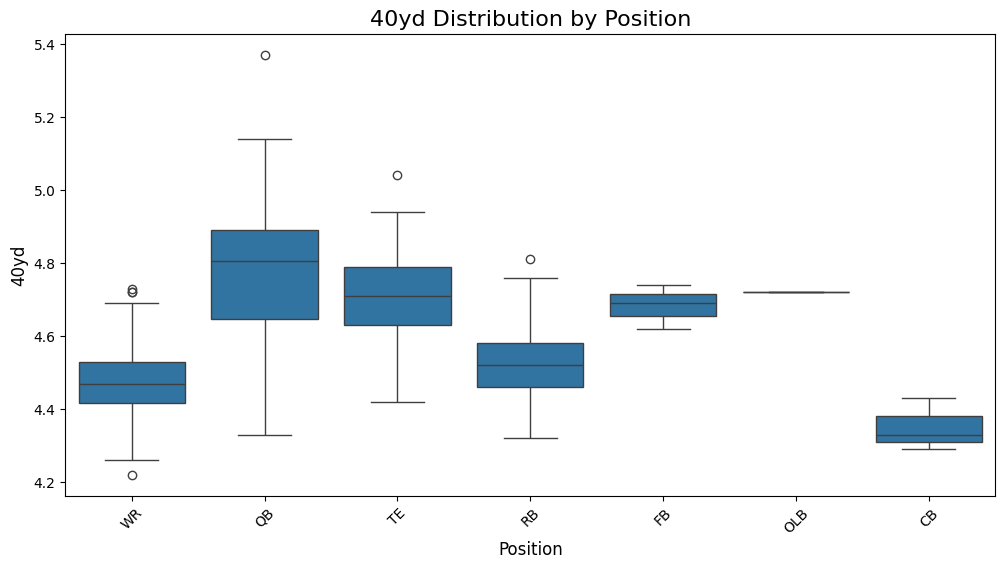

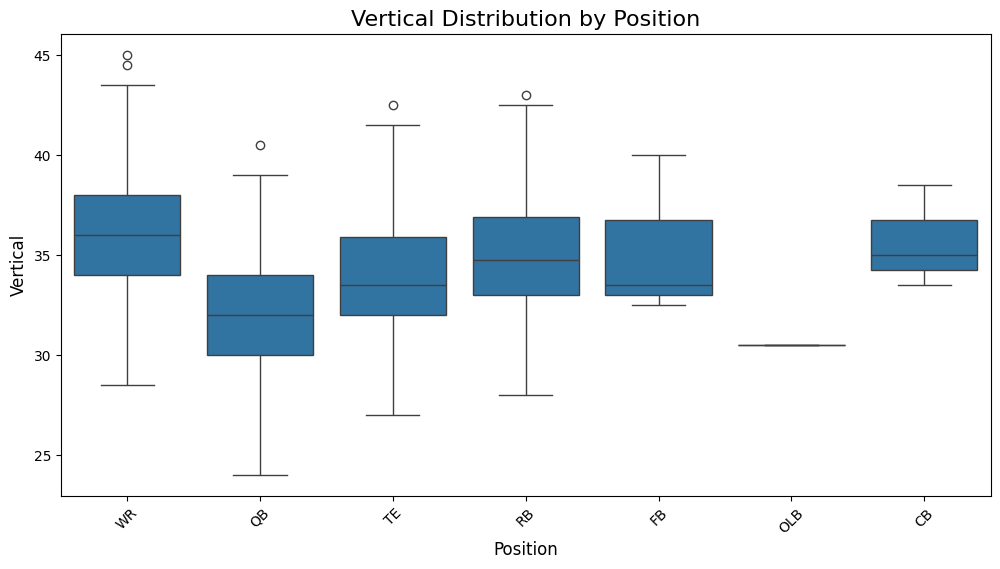

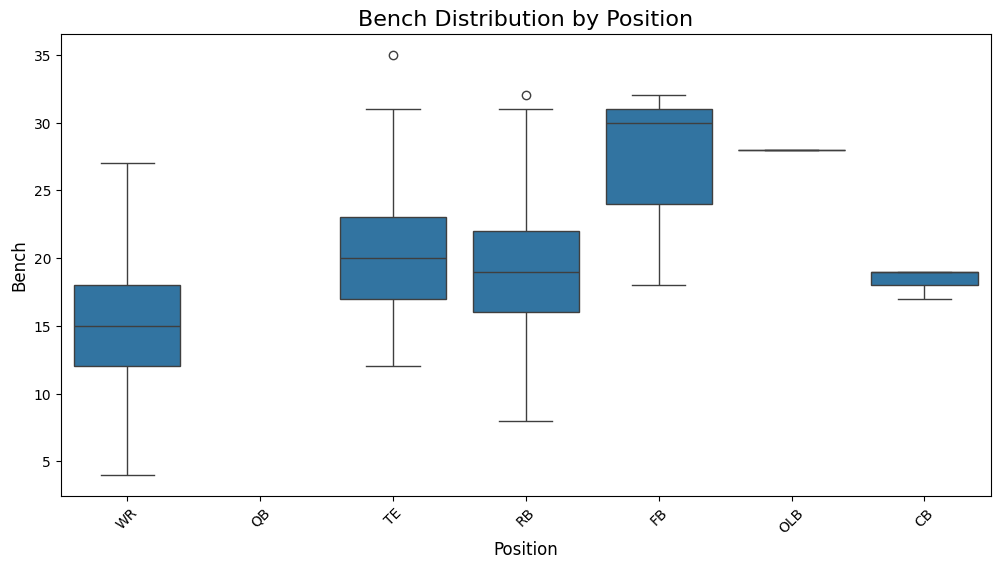

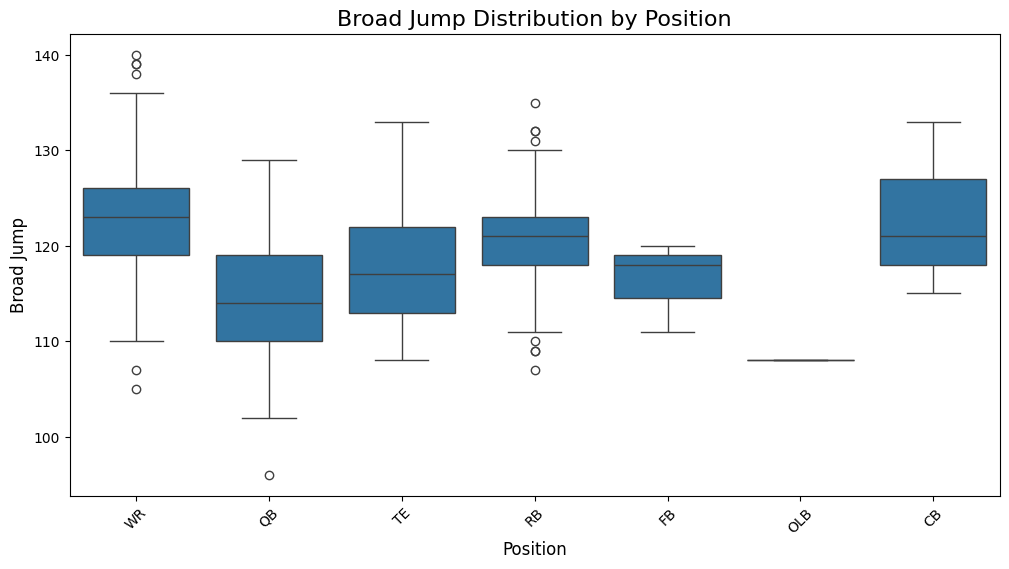

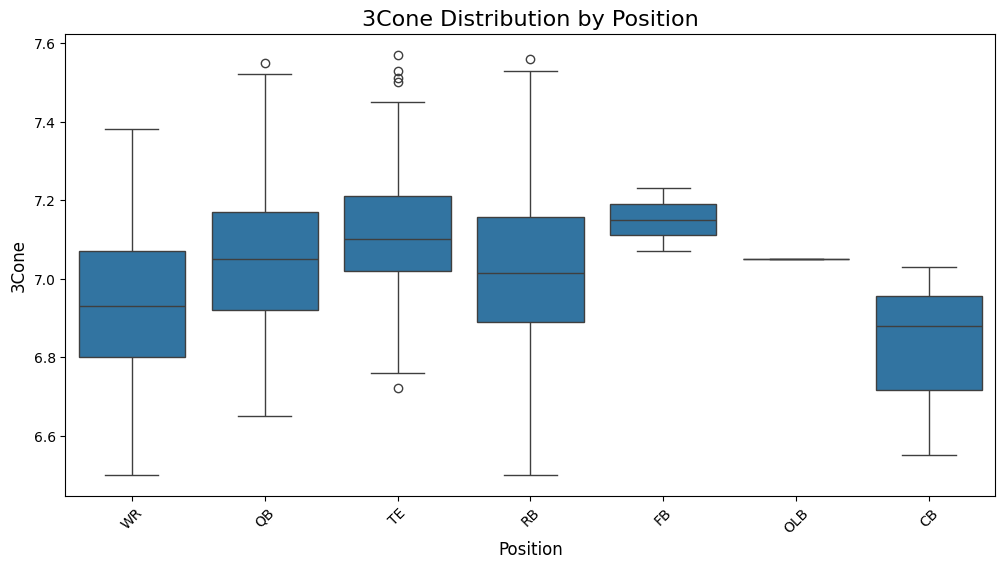

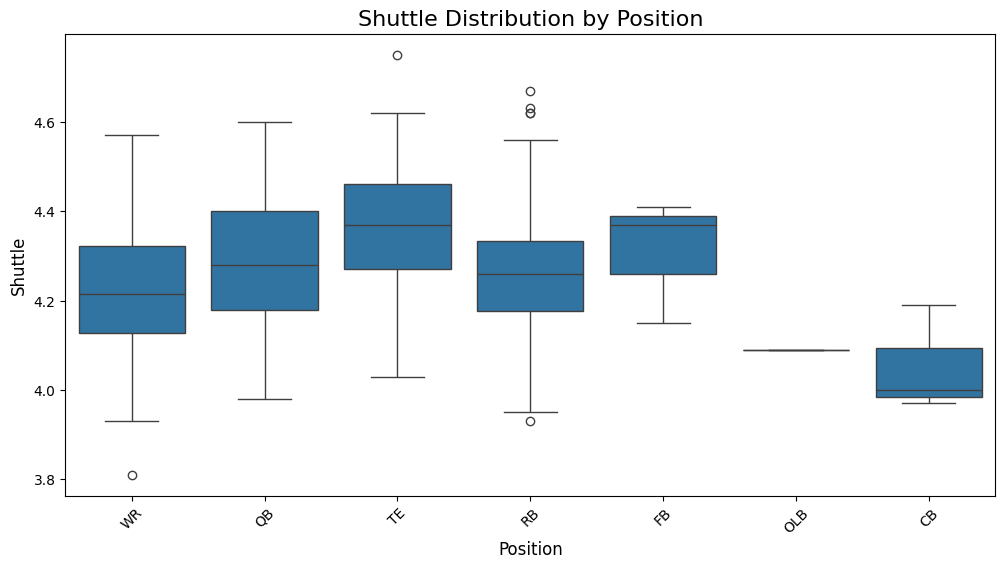

In [ ]:
#boxplot of combine events
combine_stats = ["Height", "Weight", "40yd", "Vertical", "Bench", "Broad Jump", "3Cone", "Shuttle"]
for stat in combine_stats:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combine, x="Pos", y=stat)
    plt.title(f"{stat} Distribution by Position", fontsize=16)
    plt.xlabel("Position", fontsize=12)
    plt.ylabel(stat, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()



### NFL Performance Data Analysis

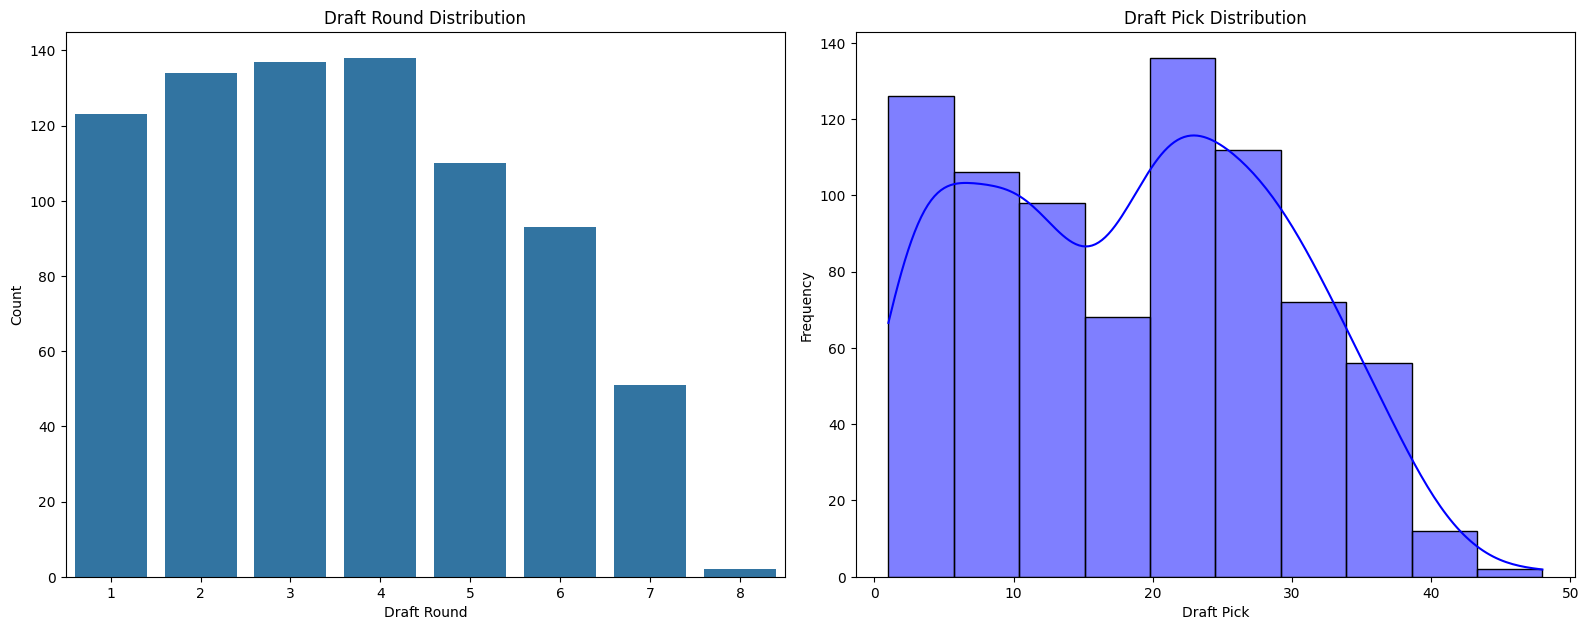

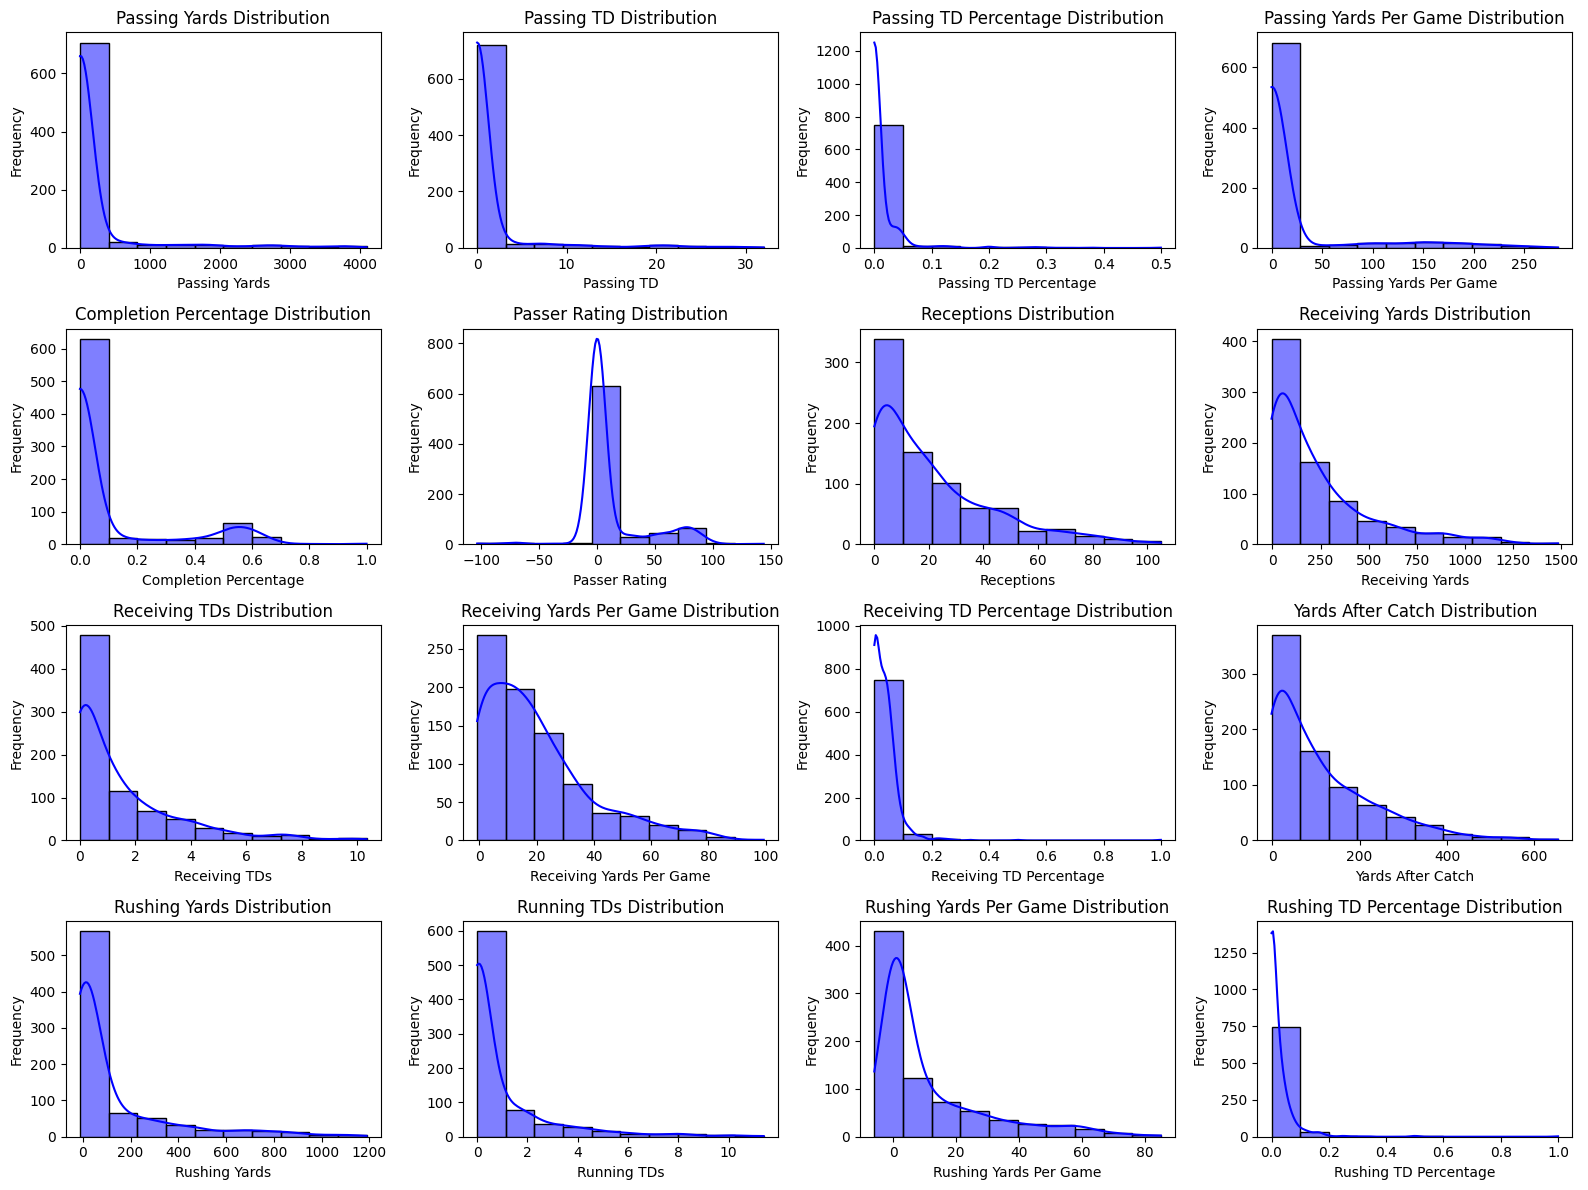

In [ ]:

plt.figure(figsize=(16, 12))
#draft visualizations
plt.subplot(2, 2, 1)
sns.countplot(x="draft_round", data=avg_performance)
plt.title("Draft Round Distribution")
plt.xlabel("Draft Round")
plt.ylabel("Count")
plt.subplot(2, 2, 2)
sns.histplot(avg_performance["draft_pick"], bins=10, kde=True, color="blue")
plt.title("Draft Pick Distribution")
plt.xlabel("Draft Pick")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#nfl performance visualizations
plt.figure(figsize=(16, 12))

def vis(col, subp, name,color_pick='blue'):
  plt.subplot(4,4,subp)
  sns.histplot(avg_performance[col].dropna(), kde=True, bins=10, color=color_pick)
  plt.title(f"{name} Distribution")
  plt.xlabel(name)
  plt.ylabel("Frequency")
  return

cols = {
      'passing_yards': 'Passing Yards',
        'pass_td': 'Passing TD',
        'pass_td_pct': "Passing TD Percentage",
        'pass_ypg': 'Passing Yards Per Game',
        'comp_pct': 'Completion Percentage',
        'passer_rating': "Passer Rating",
       'receptions': "Receptions",
        'receiving_yards': "Receiving Yards",
        'reception_td': "Receiving TDs",
        'rec_ypg': 'Receiving Yards Per Game',
       'rec_td_pct': 'Receiving TD Percentage',
        'yards_after_catch': 'Yards After Catch',
       'rushing_yards': 'Rushing Yards',
        'run_td': 'Running TDs',
        'rush_ypg': 'Rushing Yards Per Game',
        'rush_td_pct': 'Rushing TD Percentage'
        }
sub_plot = 1
for col, name in cols.items():
  vis(col, sub_plot, name)
  sub_plot += 1

plt.tight_layout()
plt.show()

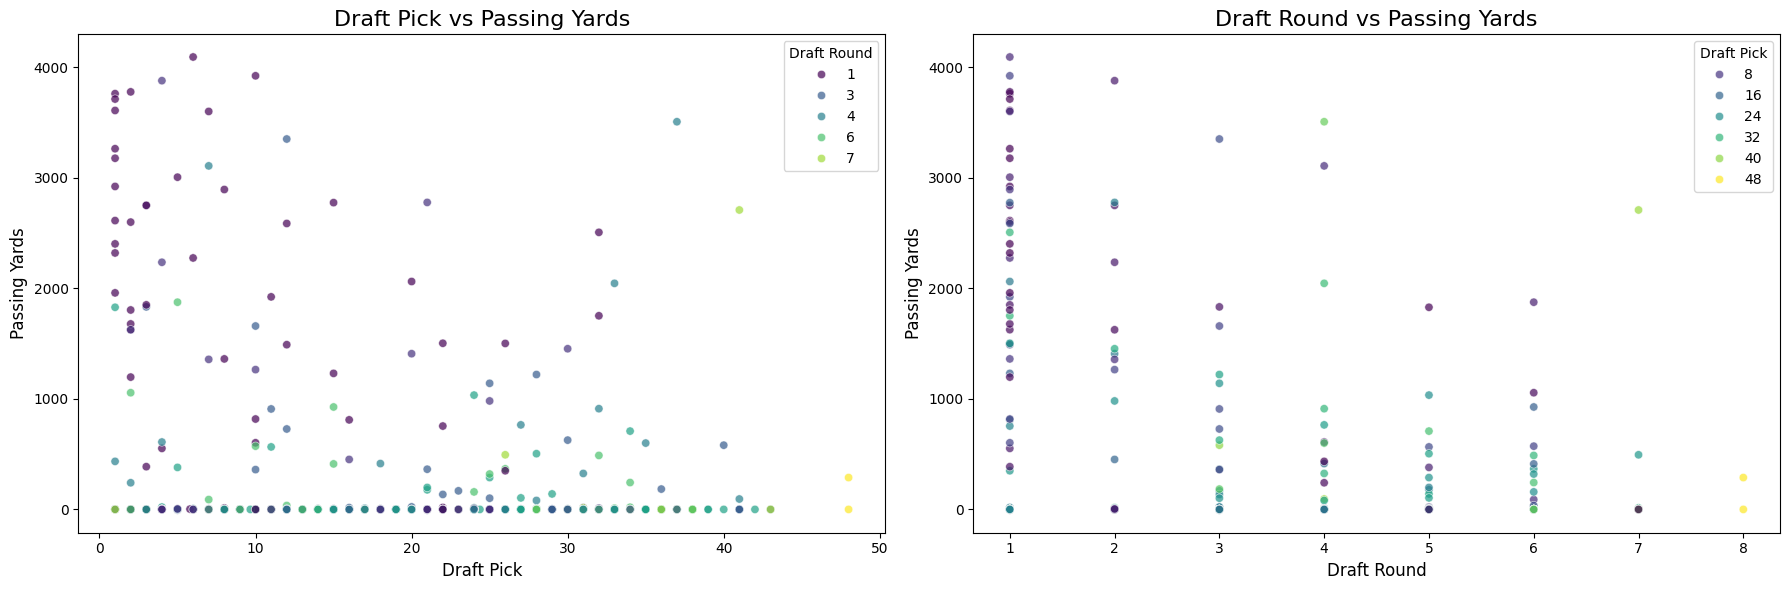

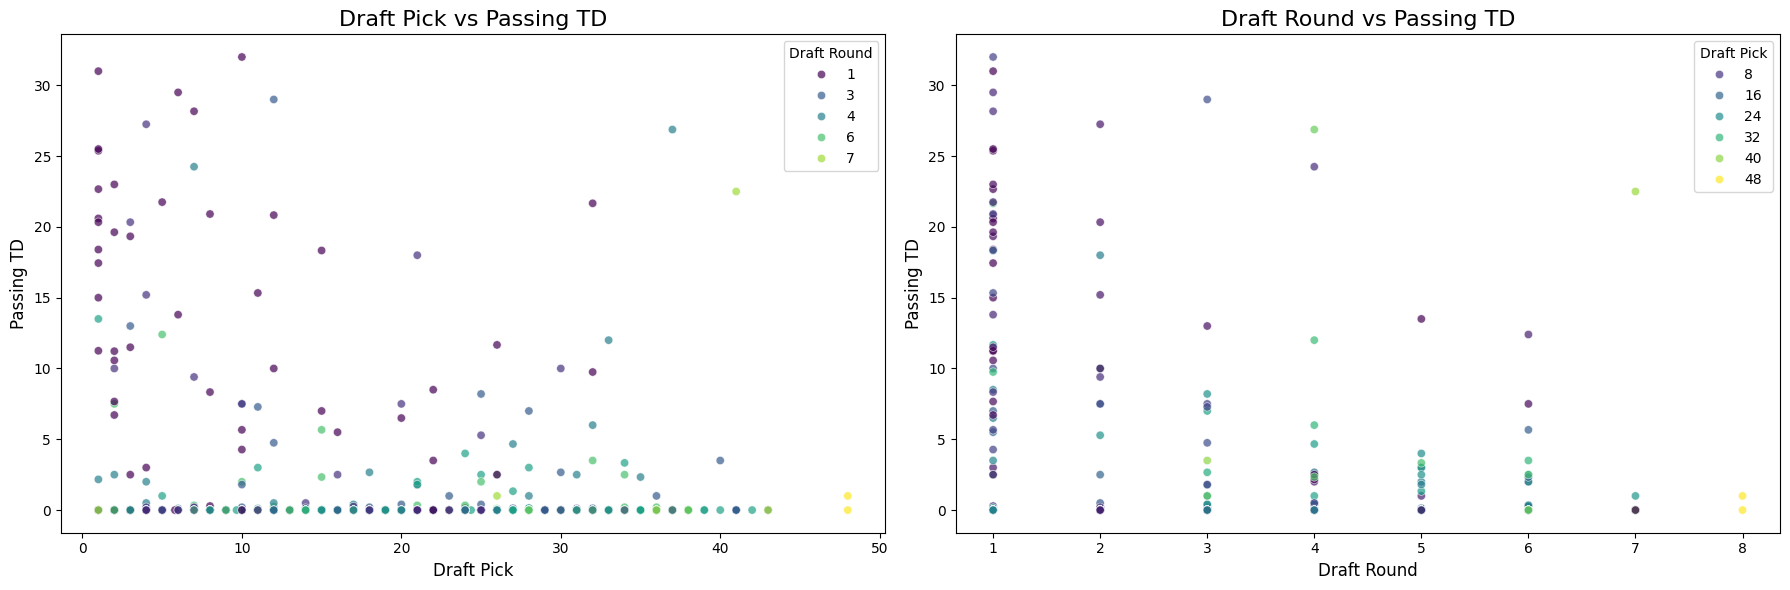

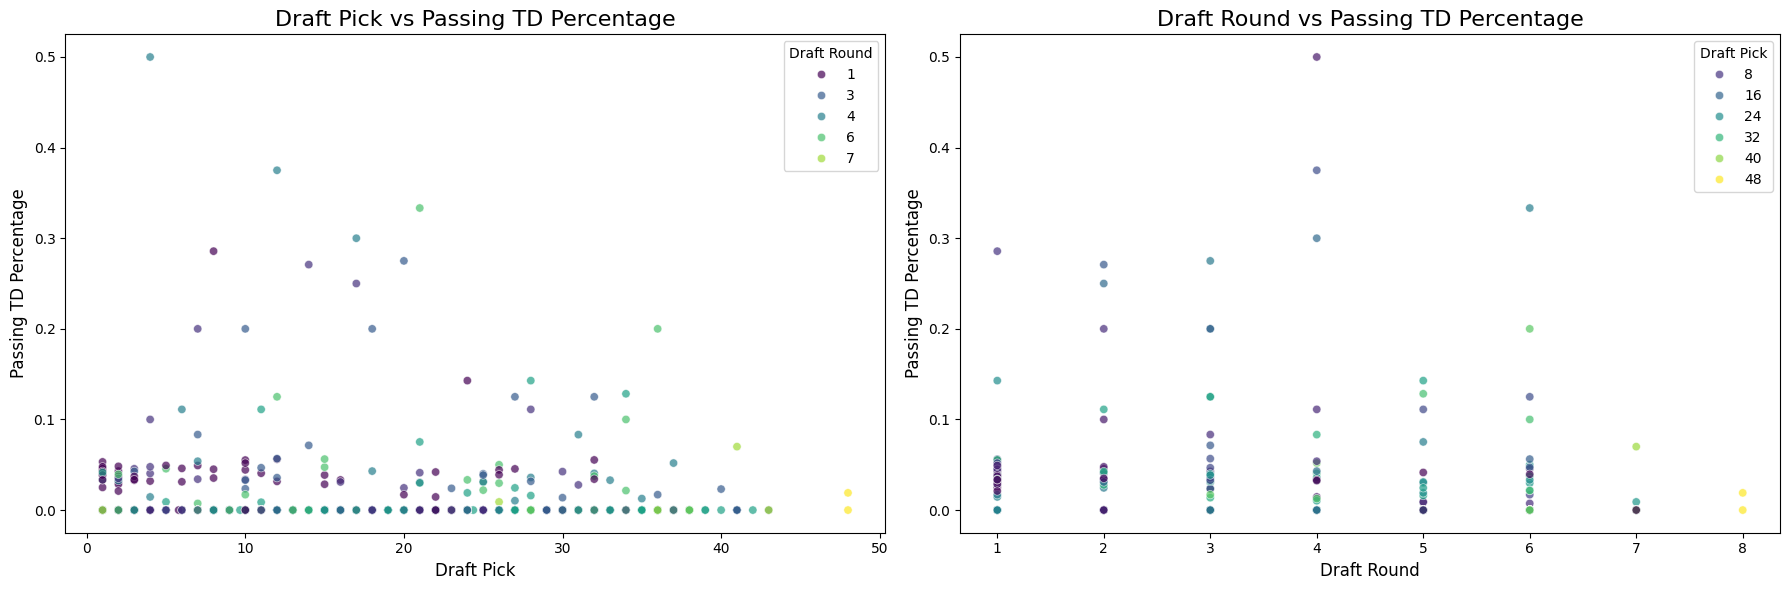

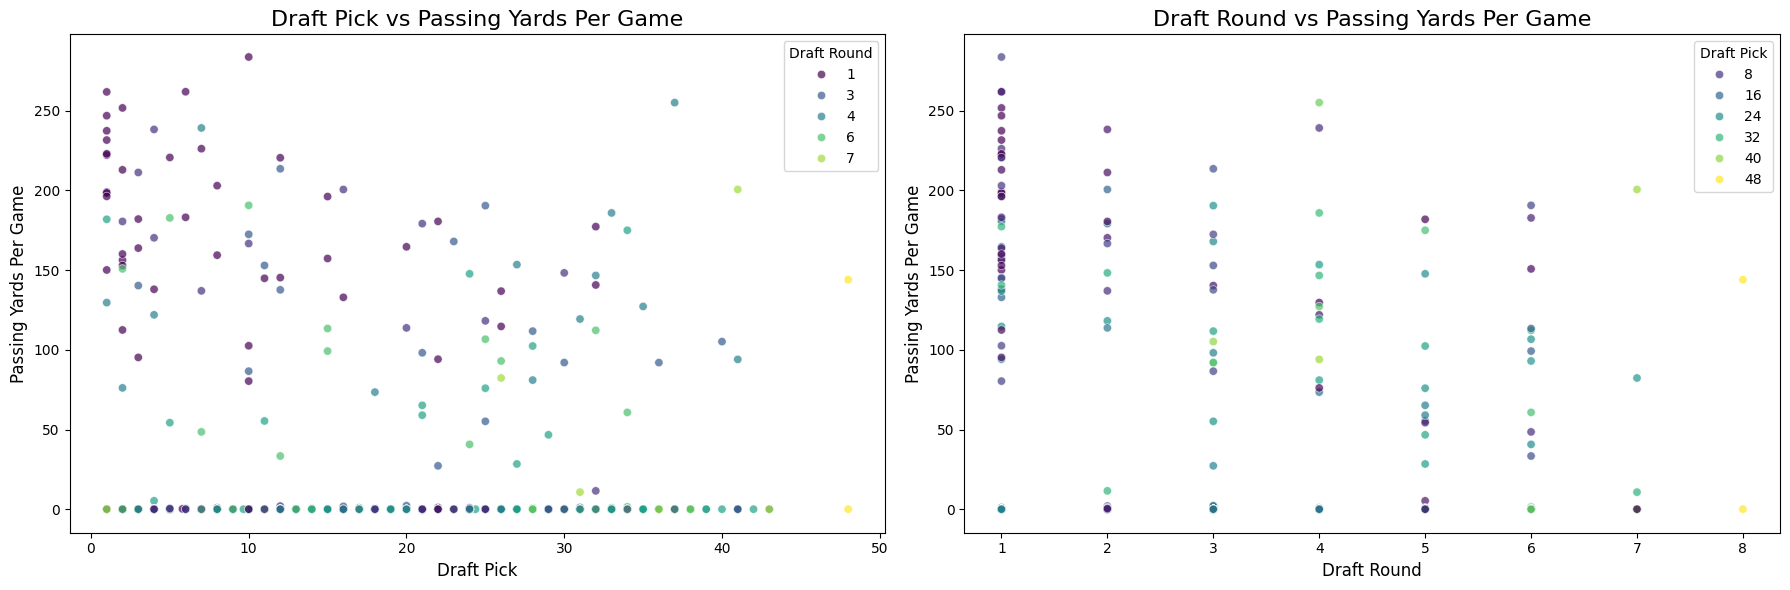

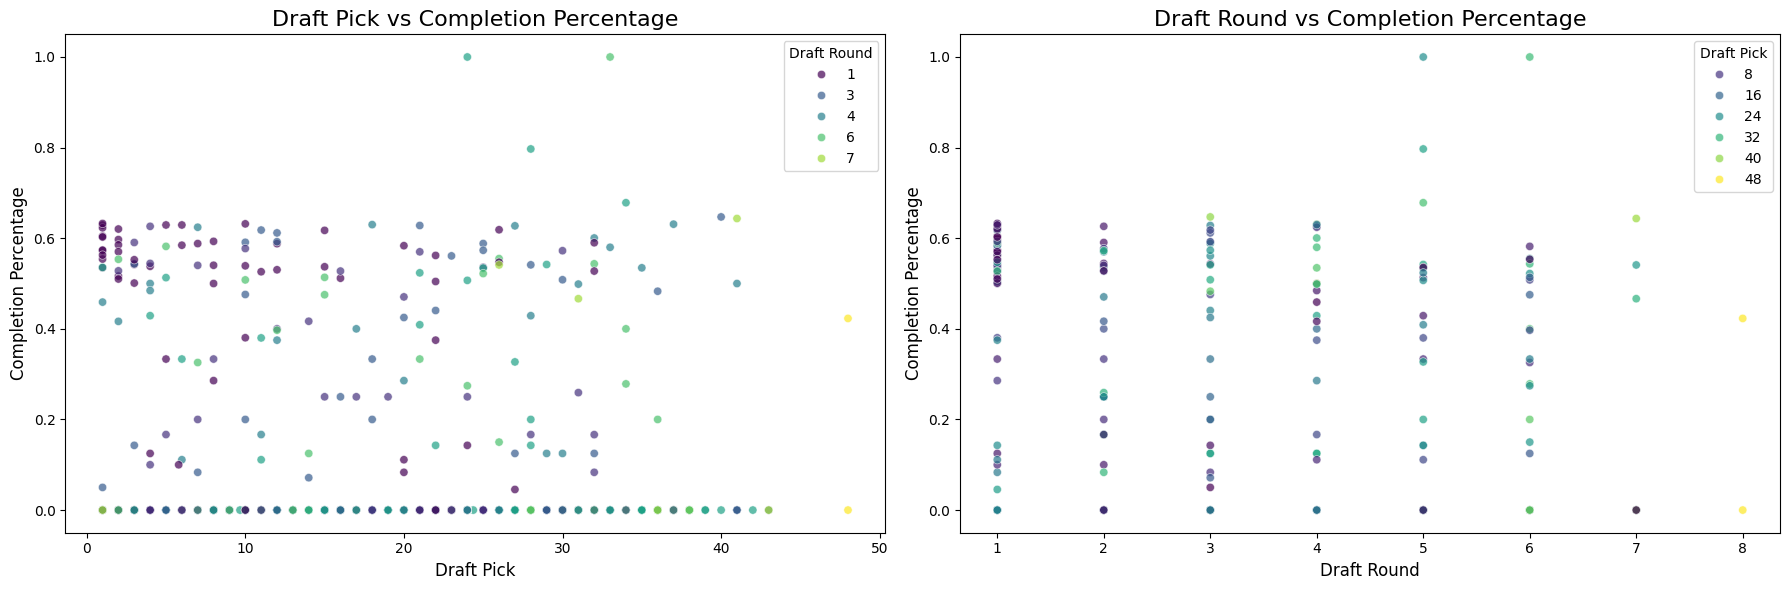

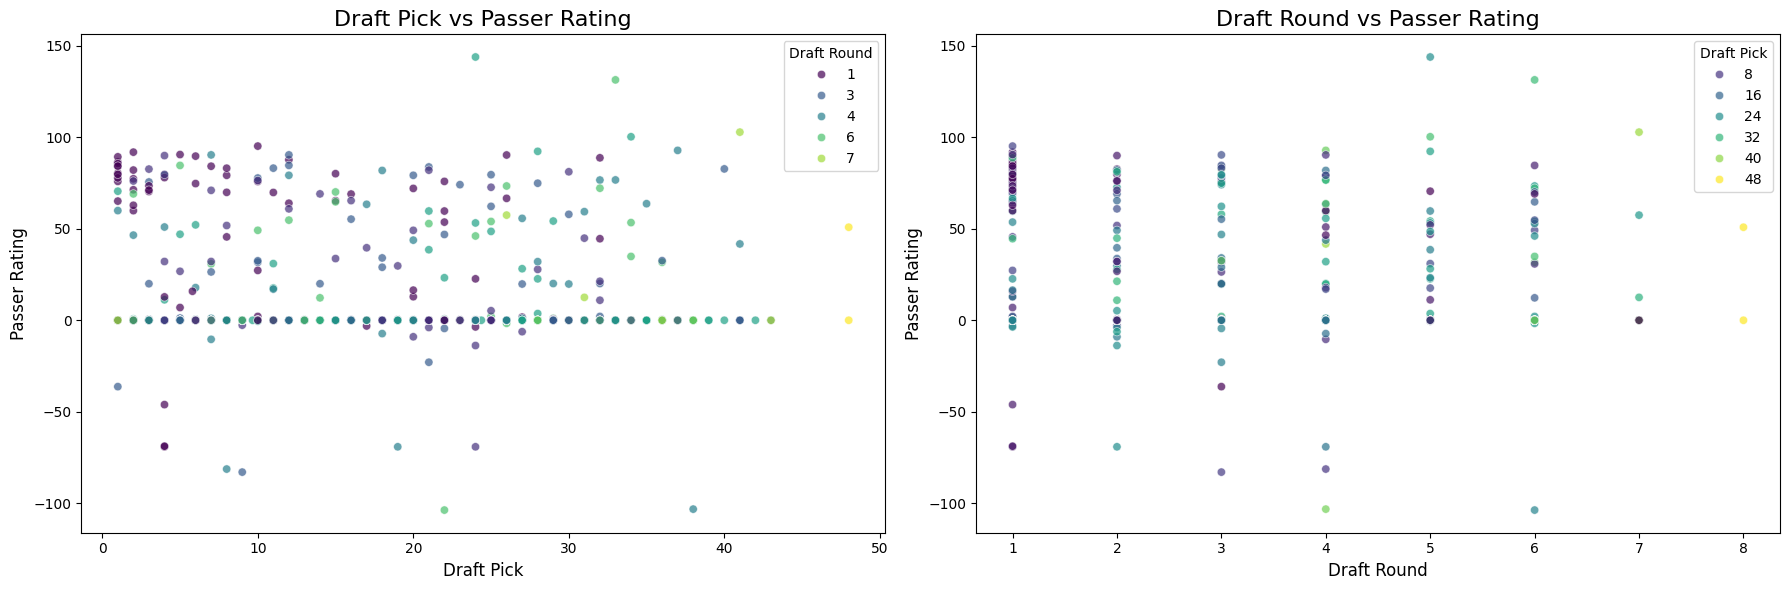

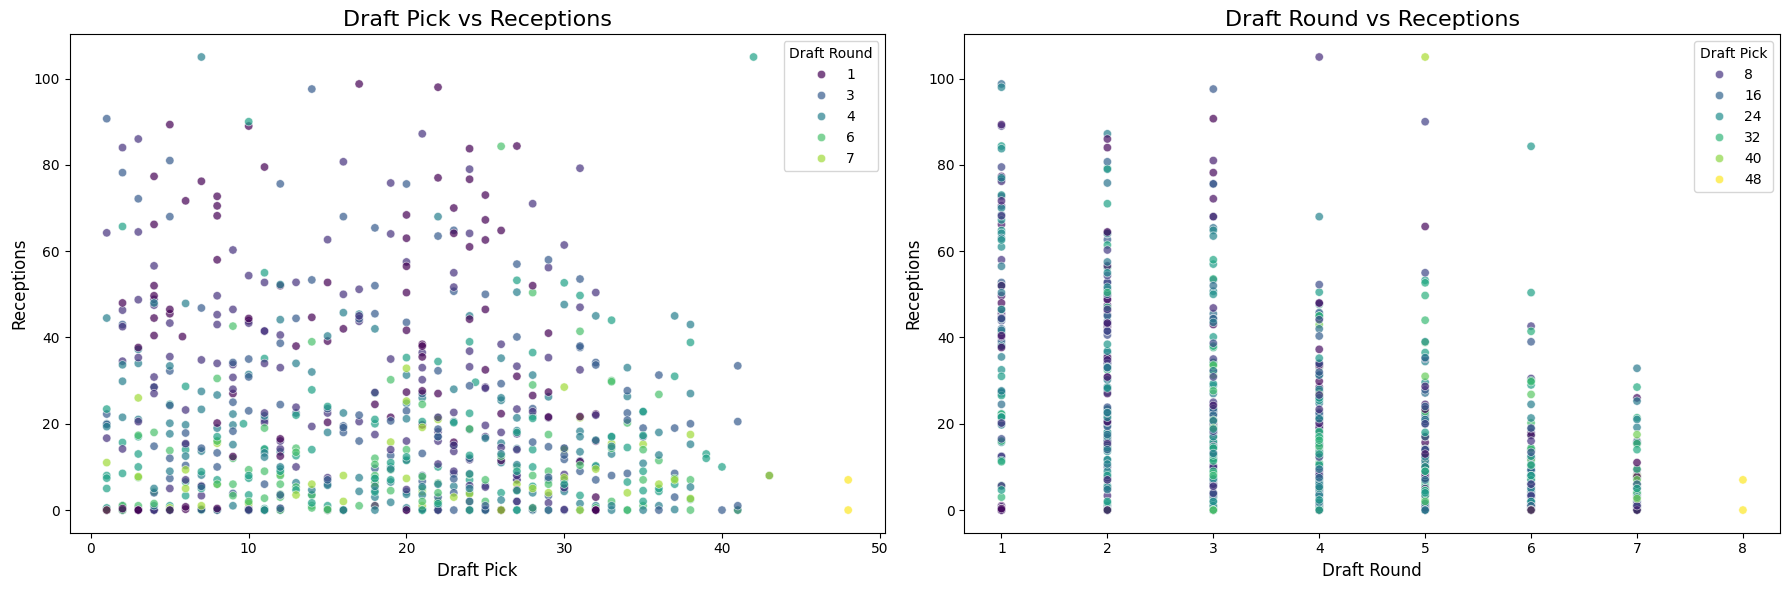

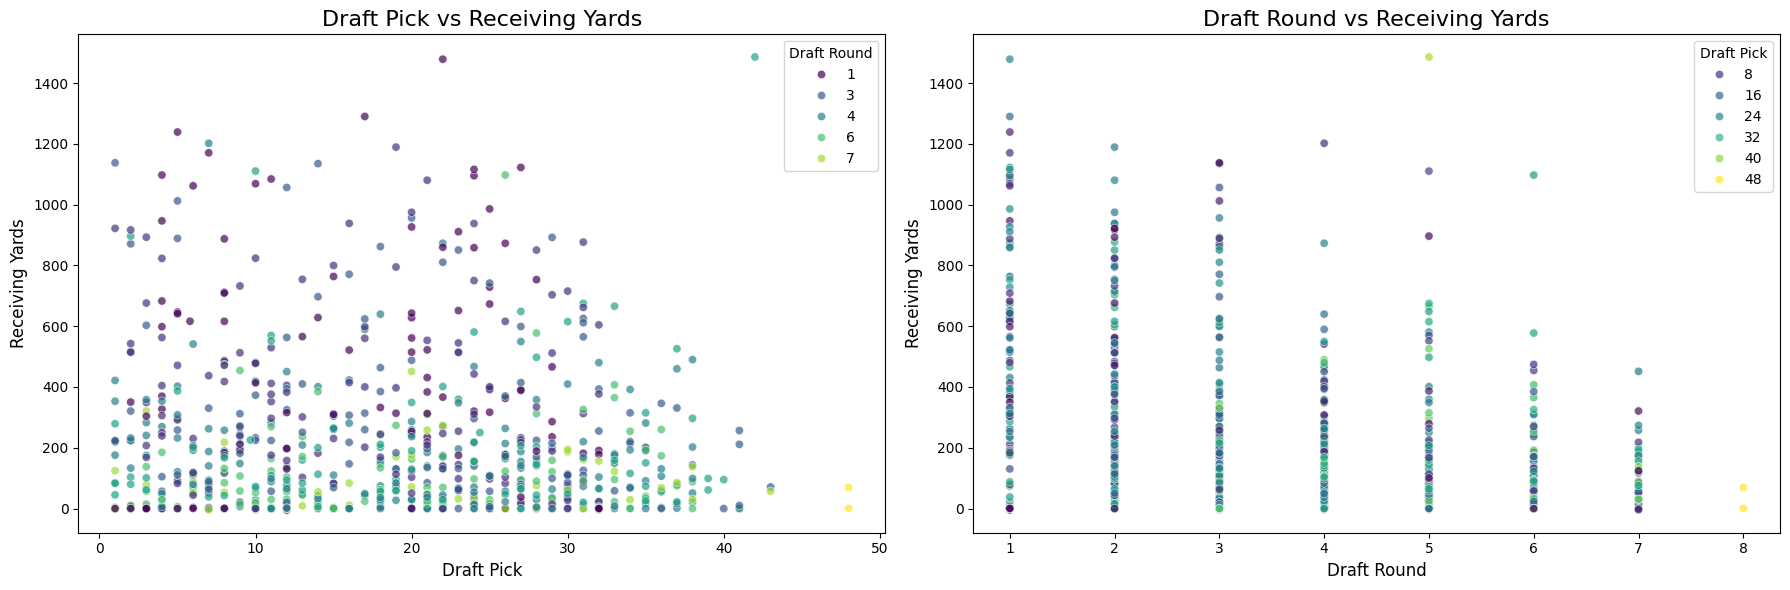

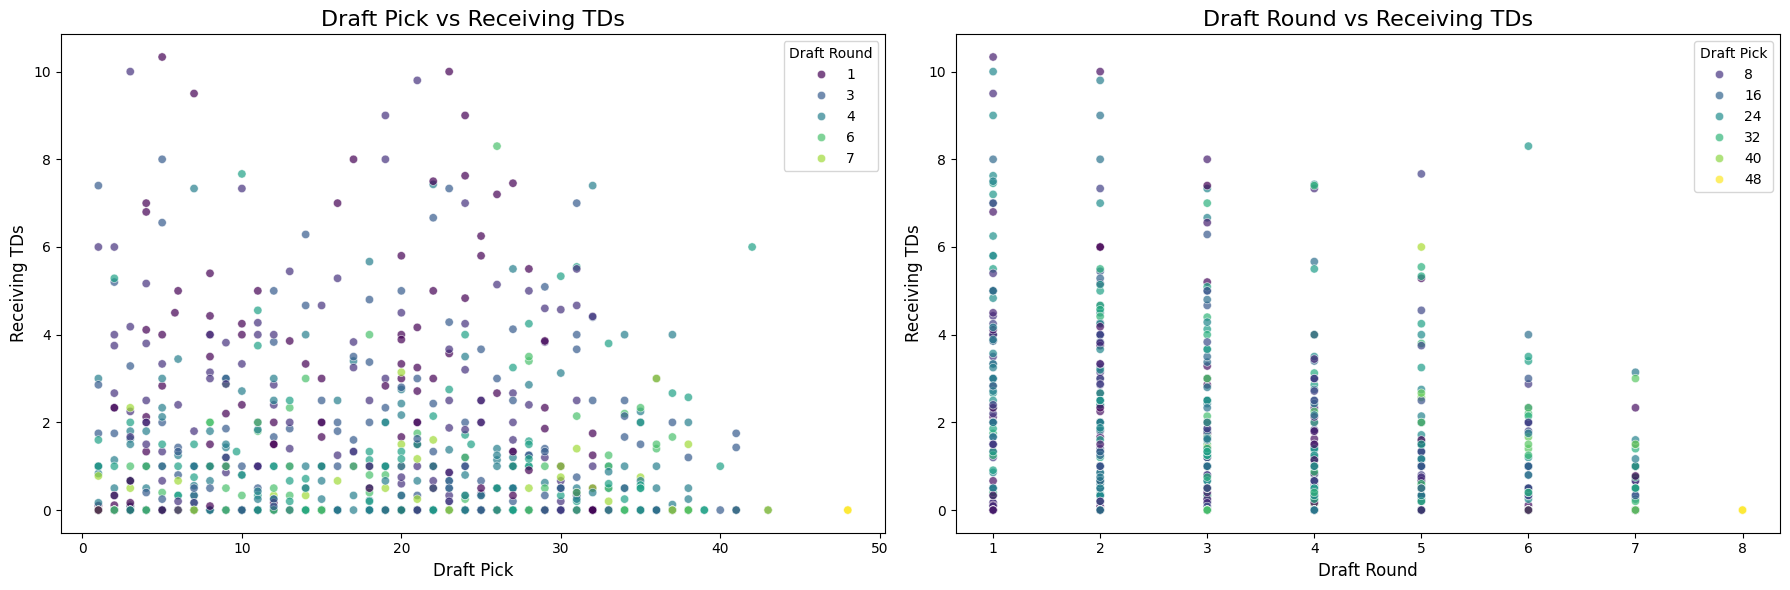

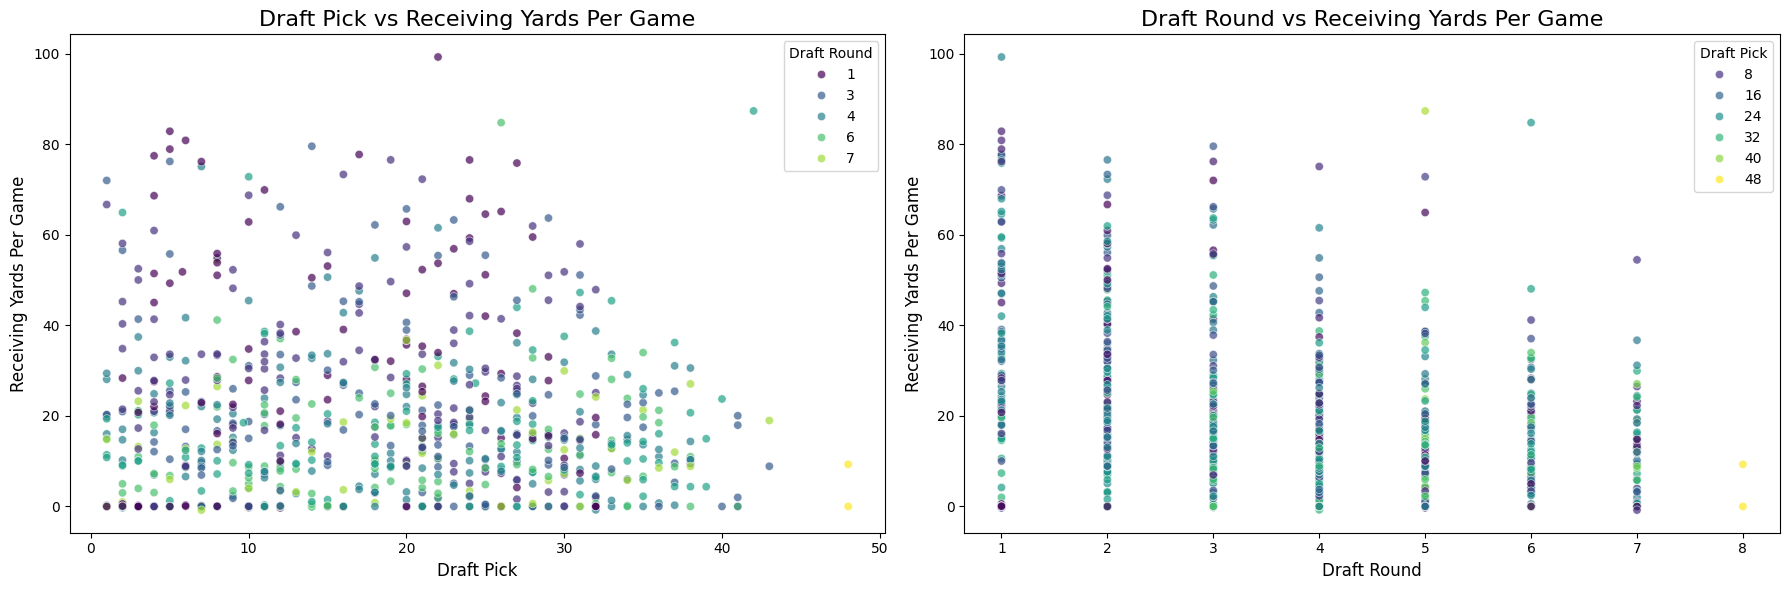

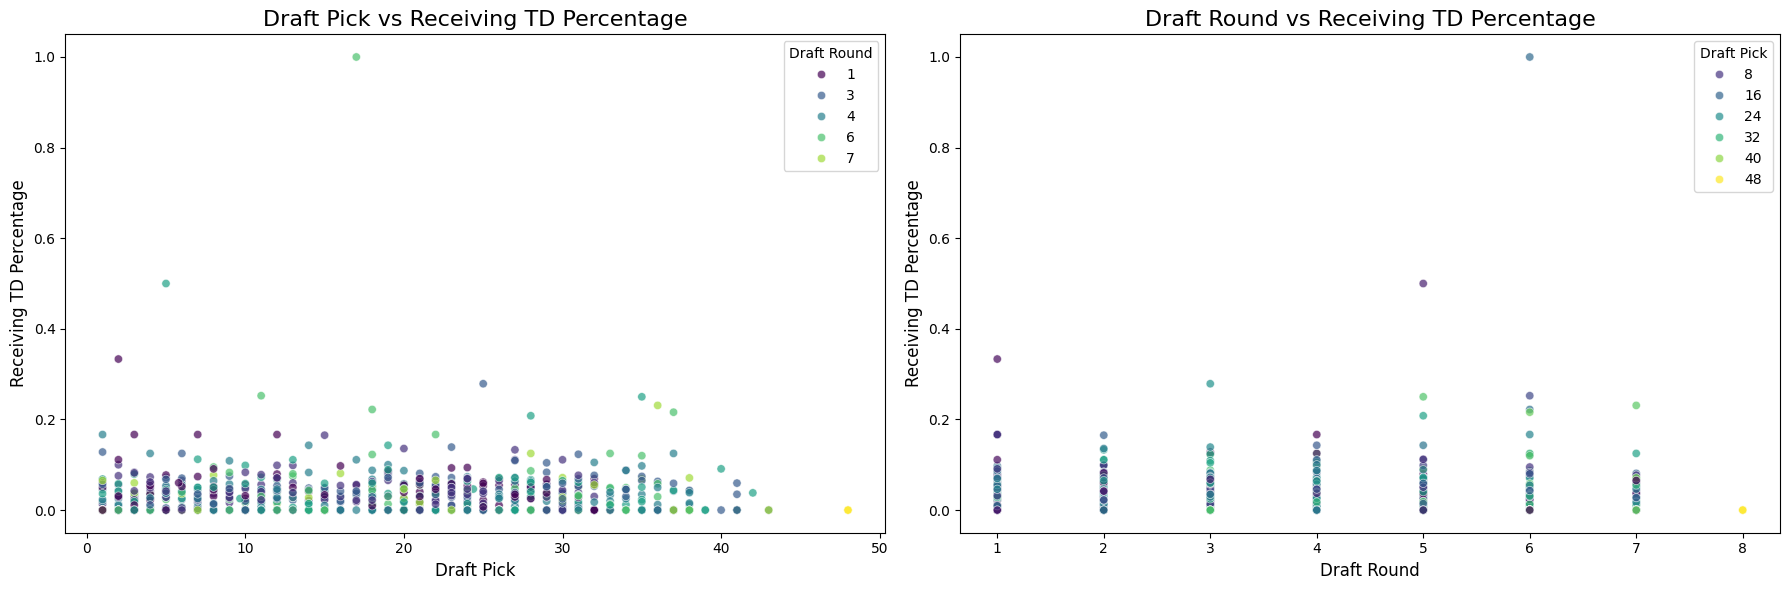

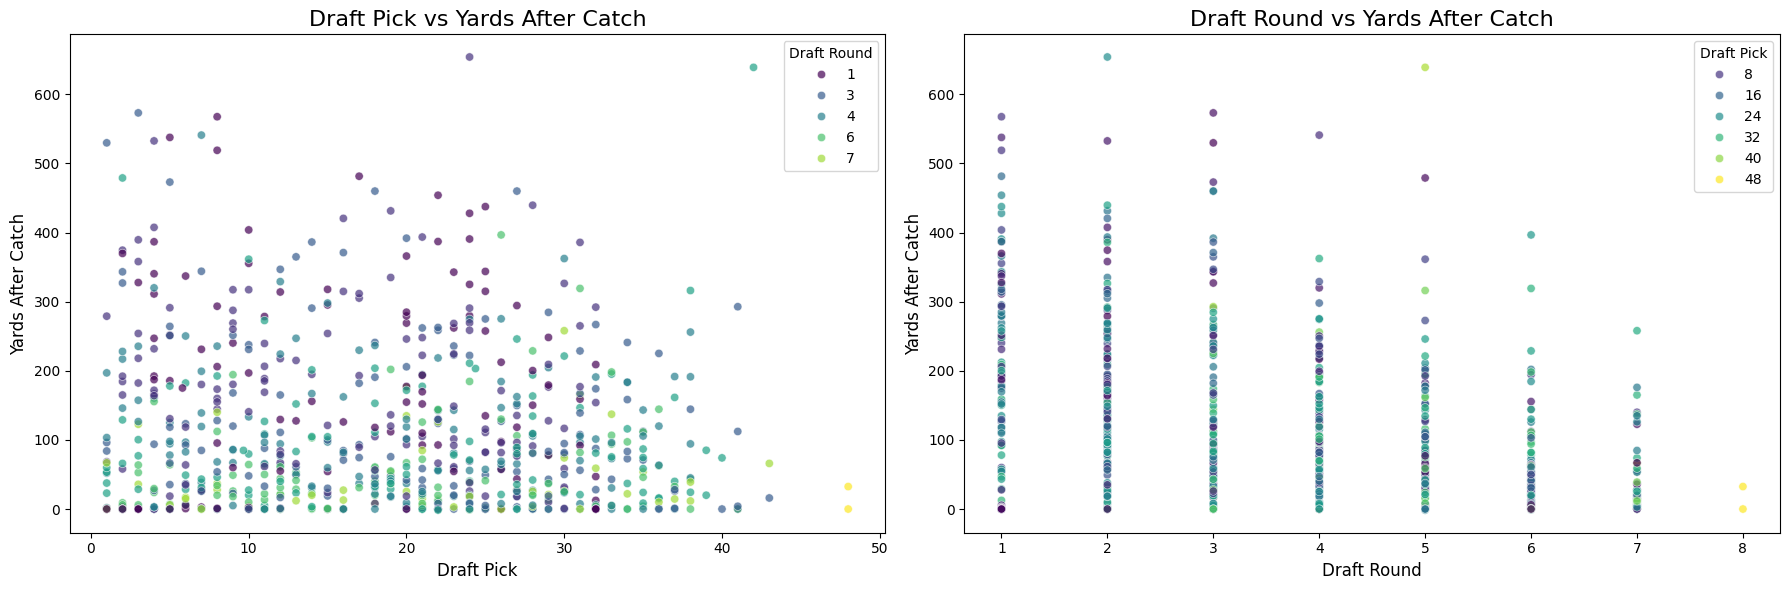

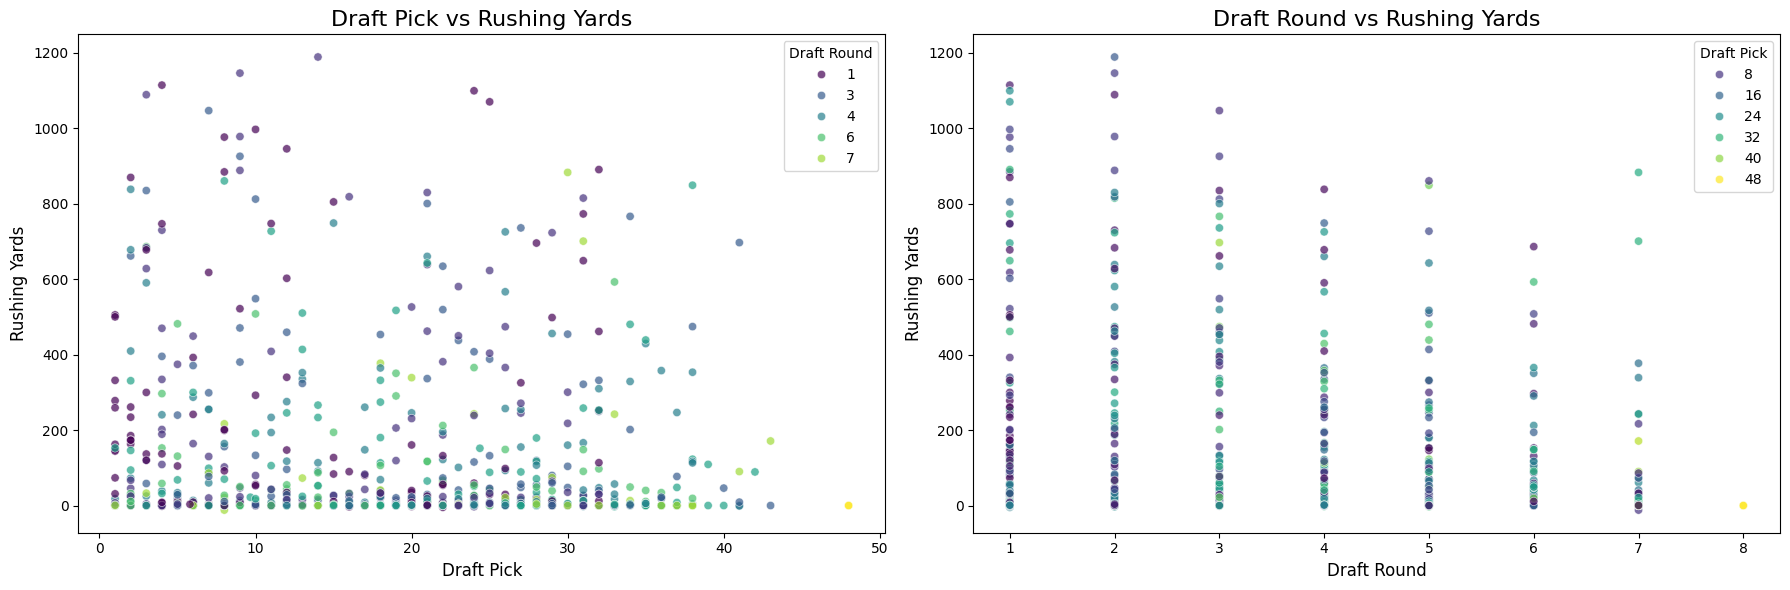

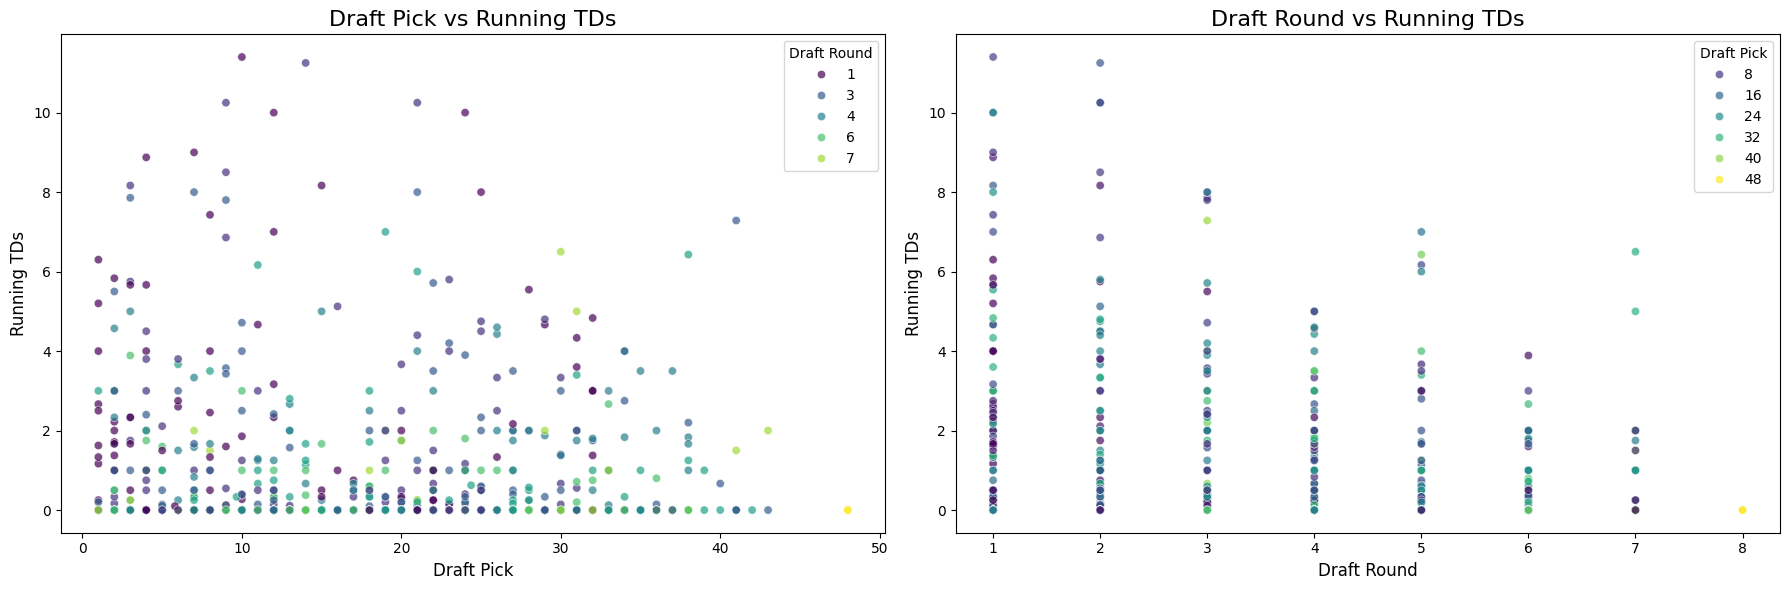

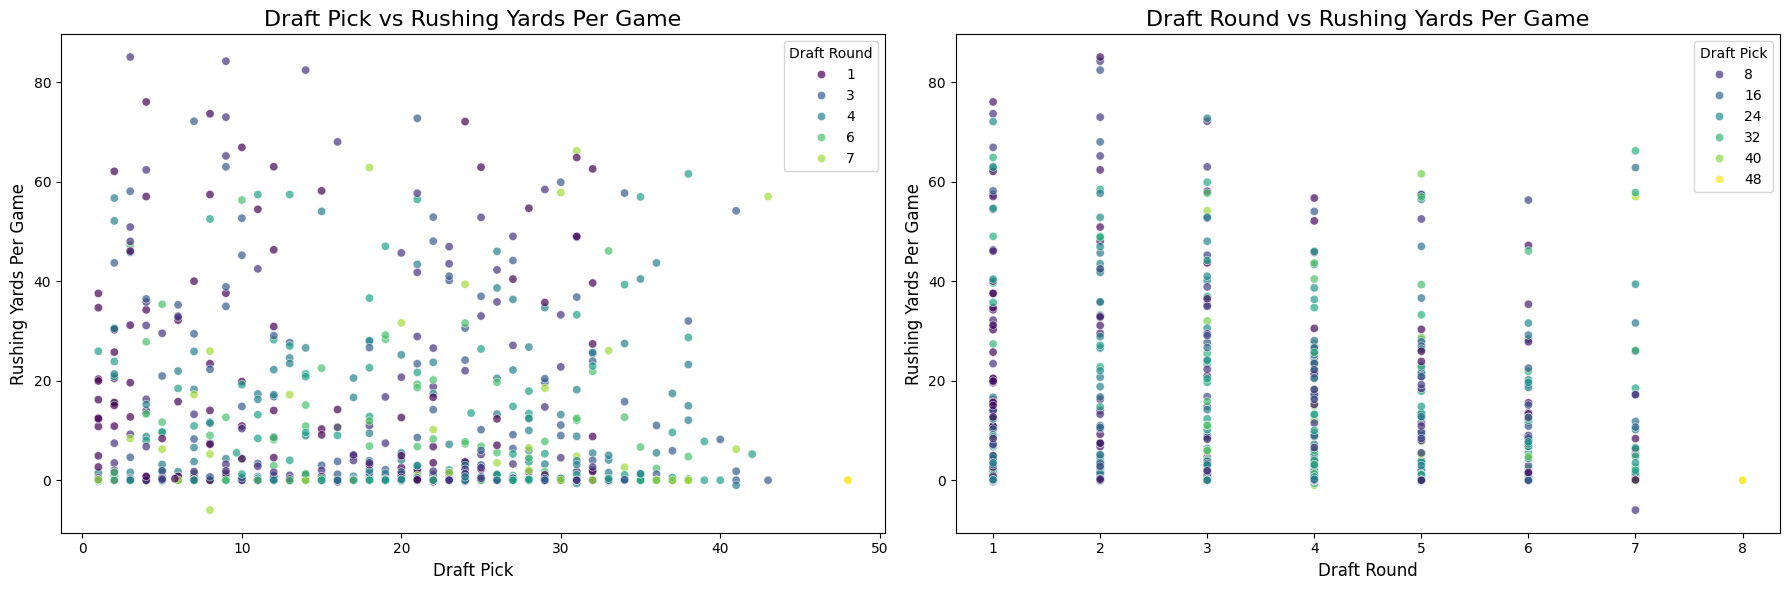

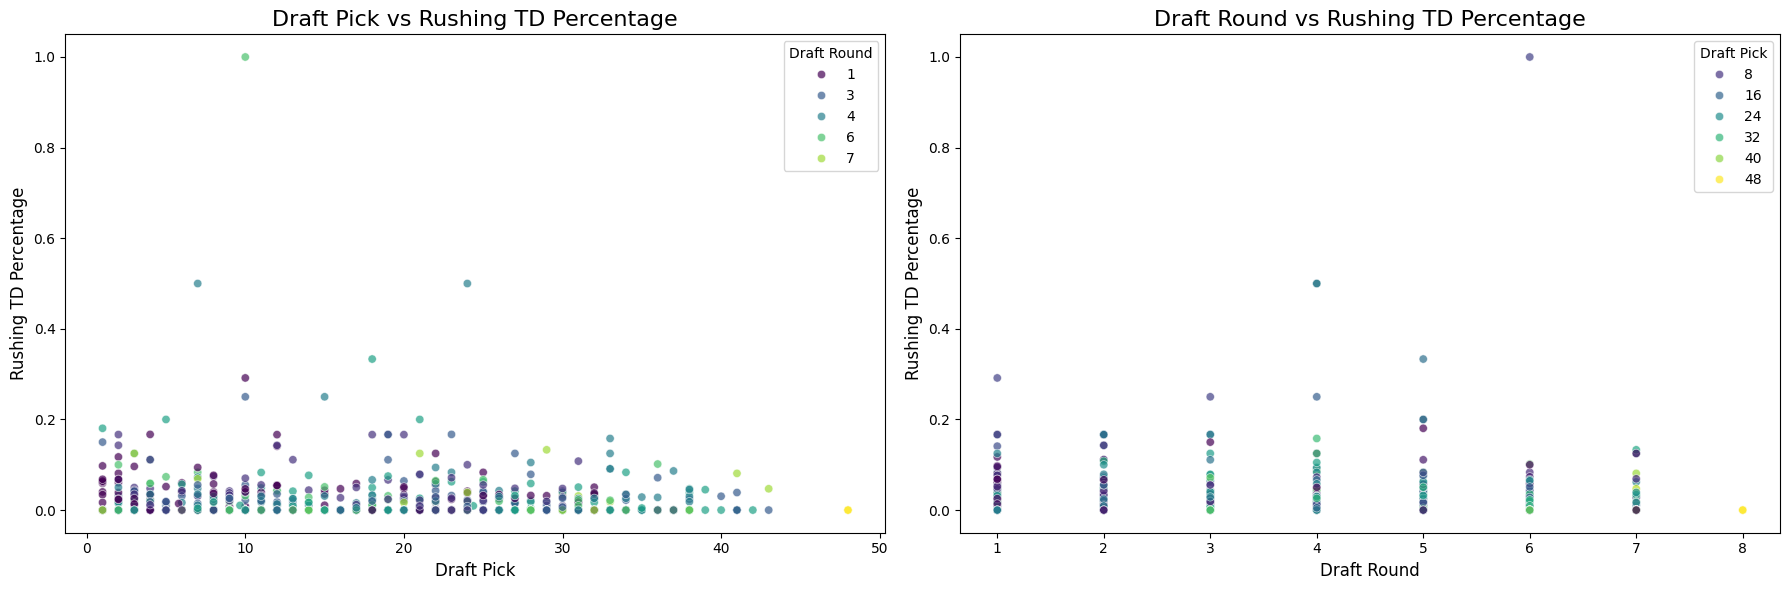

In [ ]:
cols = {
      'passing_yards': 'Passing Yards',
        'pass_td': 'Passing TD',
        'pass_td_pct': "Passing TD Percentage",
        'pass_ypg': 'Passing Yards Per Game',
        'comp_pct': 'Completion Percentage',
        'passer_rating': "Passer Rating",
       'receptions': "Receptions",
        'receiving_yards': "Receiving Yards",
        'reception_td': "Receiving TDs",
        'rec_ypg': 'Receiving Yards Per Game',
       'rec_td_pct': 'Receiving TD Percentage',
        'yards_after_catch': 'Yards After Catch',
       'rushing_yards': 'Rushing Yards',
        'run_td': 'Running TDs',
        'rush_ypg': 'Rushing Yards Per Game',
        'rush_td_pct': 'Rushing TD Percentage'
        }

def plot_by_pick_round(y_val, name):
  fig, axes = plt.subplots(1, 2, figsize=(18, 6))
  sns.scatterplot(
    data=avg_performance,
    x="draft_pick",
    y=y_val,
    hue="draft_round",
    palette="viridis",
    alpha=0.7,
    ax=axes[0]
  )
  axes[0].set_title(f"Draft Pick vs {name}", fontsize=16)
  axes[0].set_xlabel("Draft Pick", fontsize=12)
  axes[0].set_ylabel(f"{name}", fontsize=12)
  axes[0].legend(title="Draft Round", loc="upper right")

  sns.scatterplot(
    data=avg_performance,
    x="draft_round",
    y=y_val,
    hue="draft_pick",
    palette="viridis",
    alpha=0.7,
    ax=axes[1]
  )
  axes[1].set_title(f"Draft Round vs {name}", fontsize=16)
  axes[1].set_xlabel("Draft Round", fontsize=12)
  axes[1].set_ylabel(f"{name}", fontsize=12)
  axes[1].legend(title="Draft Pick", loc="upper right")


  plt.tight_layout()
  plt.show()
  return

for col,name in cols.items():
  plot_by_pick_round(col, name)

In [ ]:
#fill null values with 0 (did not complete the combine event), doing after exploration in order to not create issues with 0 values throwing off mean values
combine.fillna(0, inplace=True)

# Data Mining

### PCA Analysis

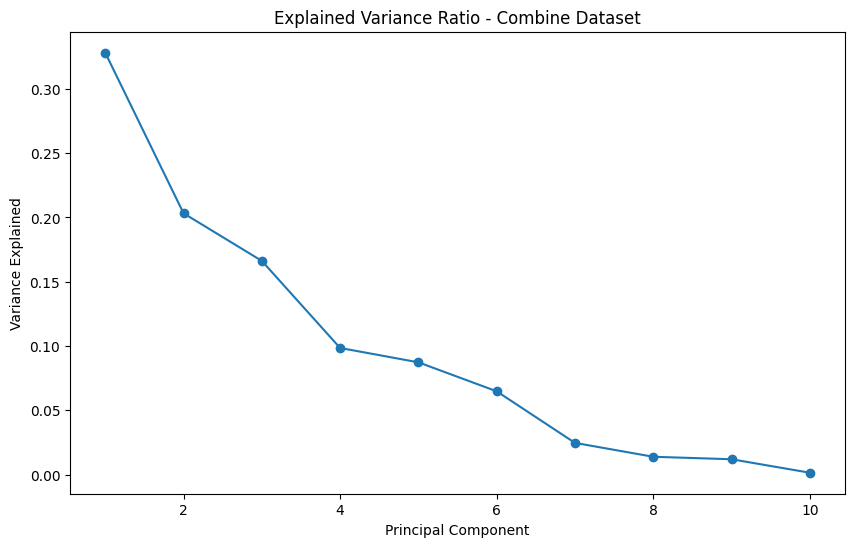

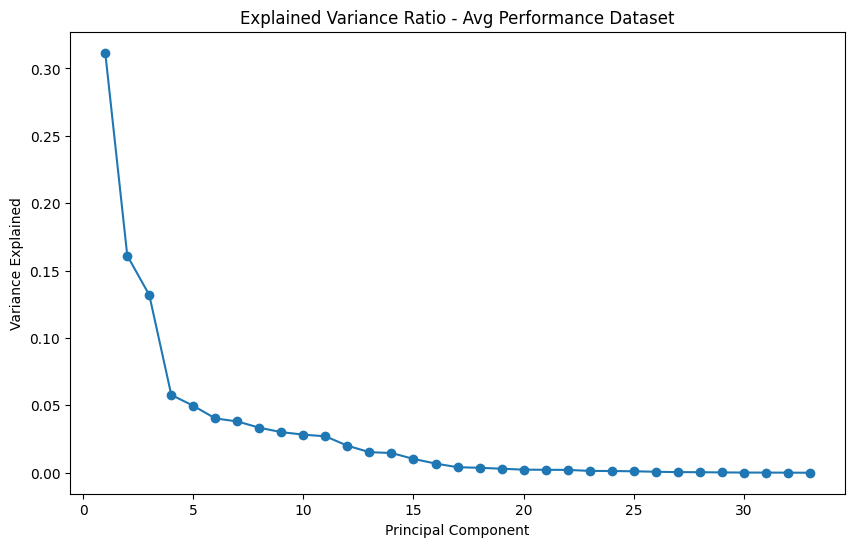

Combine Dataset - First 2 Principal Components:
           Player       PC1       PC2
0  Arrelious Benn -0.656622 -1.022105
1    Sam Bradford -3.677076 -1.581505
2  Dezmon Briscoe  1.575993  1.284162
3   Antonio Brown  1.507796  1.881879
4      Dez Bryant -3.664920 -1.095134
Avg Performance Dataset - First 2 Principal Components:
       player_name       PC1       PC2
0       A.J. Brown -4.902075  5.824052
1       A.J. Green -3.842410  4.982677
2     A.J. Jenkins -0.334883 -1.377149
3       A.T. Perry -2.609113 -0.963175
4  Aaron Burbridge -0.858869 -2.956138


In [ ]:
#PCA Analysis
# Combine Dataset PCA
combine_numeric = combine.drop(columns=["Year", "Player", "Pos", "School", "Drafted"]).fillna(0)
scaler_combine = StandardScaler()
combine_scaled = scaler_combine.fit_transform(combine_numeric)
pca_combine = PCA()
combine_pca = pca_combine.fit_transform(combine_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_combine.explained_variance_ratio_) + 1), pca_combine.explained_variance_ratio_, marker='o')
plt.title("Explained Variance Ratio - Combine Dataset")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# Avg Performance Dataset PCA
avg_perf_numeric = avg_performance.drop(columns=["player_name", "college", "Pos"]).fillna(0)
scaler_avg_perf = StandardScaler()
avg_perf_scaled = scaler_avg_perf.fit_transform(avg_perf_numeric)
pca_avg_perf = PCA()
avg_perf_pca = pca_avg_perf.fit_transform(avg_perf_scaled)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_avg_perf.explained_variance_ratio_) + 1), pca_avg_perf.explained_variance_ratio_, marker='o')
plt.title("Explained Variance Ratio - Avg Performance Dataset")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# For Combine Dataset PCA
combine_pca_df = pd.DataFrame(combine_pca, columns=[f"PC{i+1}" for i in range(combine_pca.shape[1])])
combine_pca_df["Player"] = combine["Player"].values  # Explicitly assign the player names

# For Avg Performance Dataset PCA
avg_perf_pca_df = pd.DataFrame(avg_perf_pca, columns=[f"PC{i+1}" for i in range(avg_perf_pca.shape[1])])
avg_perf_pca_df["player_name"] = avg_performance["player_name"].values  # Explicitly assign the player names

# Display First 2 Principal Components for Combine Dataset

print("Combine Dataset - First 2 Principal Components:")
print(combine_pca_df[["Player", "PC1", "PC2"]].head())

# Display First 2 Principal Components for Avg Performance Dataset

print("Avg Performance Dataset - First 2 Principal Components:")
print(avg_perf_pca_df[["player_name", "PC1", "PC2"]].head())

Finding Best Number of Components

In [ ]:
cumulative_variance = np.cumsum(pca_combine.explained_variance_ratio_)
k_combine = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance for Combine Dataset: {k_combine}")

cumulative_variance_avg = np.cumsum(pca_avg_perf.explained_variance_ratio_)

k_avg_perf = np.argmax(cumulative_variance_avg >= 0.95) + 1
print(f"Number of components explaining 95% variance for Avg Performance Dataset: {k_avg_perf}")

Number of components explaining 95% variance for Combine Dataset: 7
Number of components explaining 95% variance for Avg Performance Dataset: 14


In [ ]:
#reduced combine dataset
pca_combine_reduced = PCA(n_components=k_combine)
combine_pca_reduced = pca_combine_reduced.fit_transform(combine_scaled)

combine_reduced_df = pd.DataFrame(
    combine_pca_reduced,
    columns=[f"PC{i+1}" for i in range(k_combine)]
)
#make sure player names are aligned in new dataset
combine_reduced_df["Player"] = combine["Player"].values
print("Reduced Combine Dataset:")
display(combine_reduced_df.head())

#reduced avg performance dataset
pca_avg_perf_reduced = PCA(n_components=k_avg_perf)
avg_perf_pca_reduced = pca_avg_perf_reduced.fit_transform(avg_perf_scaled)

avg_perf_reduced_df = pd.DataFrame(
    avg_perf_pca_reduced,
    columns=[f"PC{i+1}" for i in range(k_avg_perf)]
)

avg_perf_reduced_df["player_name"] = avg_performance["player_name"].values
print("Reduced Avg Performance Dataset:")
display(avg_perf_reduced_df.head())


Reduced Combine Dataset:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Player
0,-0.656622,-1.022105,-0.778534,0.049530,2.061127,-0.419867,-0.093378,Arrelious Benn
1,-3.677076,-1.581505,-0.011691,0.050467,-0.112311,2.026374,0.067466,Sam Bradford
2,1.575993,1.284162,0.786682,-0.298877,-0.639011,0.287162,-0.355040,Dezmon Briscoe
3,1.507796,1.881879,0.037759,0.282149,-0.511689,0.171366,-0.566939,Antonio Brown
4,-3.664920,-1.095134,-0.312368,0.162236,-0.243895,1.857893,0.000869,Dez Bryant


Reduced Avg Performance Dataset:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,player_name
0,-4.902075,5.824052,-1.573387,-0.886634,-0.829819,-0.674213,0.589862,1.337602,0.408365,-0.280998,0.721586,0.382790,0.224673,0.408218,A.J. Brown
1,-3.842410,4.982677,-2.316596,1.181336,1.333234,0.605467,-1.257822,0.223309,-0.156259,-0.911390,-0.309715,0.386739,0.056661,-0.320992,A.J. Green
2,-0.334883,-1.377149,-0.470976,0.289106,-0.350042,0.252131,-2.019351,-1.707748,-0.559579,0.565242,1.011021,-0.475798,-1.235527,-0.072904,A.J. Jenkins
3,-2.609113,-0.963175,-2.076173,0.131552,-1.723800,2.319221,2.918900,0.962359,0.700461,1.786393,-1.006733,0.127497,0.618169,-0.700243,A.T. Perry
4,-0.858869,-2.956138,-0.750594,-0.705636,0.047227,0.179376,0.907151,-0.076339,-0.821832,-0.326292,0.957010,-0.974047,-0.603048,-0.006917,Aaron Burbridge


In [ ]:
# Extract PCA features
combine_reduced_df = combine_reduced_df.set_index("Player")
combine_pca_features = combine_reduced_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']]

avg_perf_reduced_df = avg_perf_reduced_df.set_index("player_name")
performance_pca_features = avg_perf_reduced_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']]

### Jaccard Similiarity


In [ ]:
# Discretize
pca_discretized = (combine_pca_features > 0.5).astype(int)

# Calculate Jaccard similarity
from scipy.spatial.distance import pdist, squareform
jaccard_sim = 1 - pdist(pca_discretized, metric="jaccard")
jaccard_sim = squareform(jaccard_sim)

jaccard_sim_df = pd.DataFrame(jaccard_sim, index=combine_reduced_df.index, columns=combine_reduced_df.index)


display(jaccard_sim_df)



Player,Arrelious Benn,Sam Bradford,Dezmon Briscoe,Antonio Brown,Dez Bryant,Jimmy Clausen,Riley Cooper,Eric Decker,Ed Dickson,Anthony Dixon,...,Cedric Tillman,Tre Tucker,Clayton Tune,Deuce Vaughn,Darnell Washington,Parker Washington,Josh Whyle,Dontayvion Wicks,Michael Wilson,Bryce Young
Player,,,,,,,,,,,,,,,,,,,,,
Arrelious Benn,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.500000,0.250000,0.000000,0.000000,...,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.00,0.500000,0.333333,0.000000
Sam Bradford,0.000000,0.0,0.000000,0.000000,1.0,1.0,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
Dezmon Briscoe,0.000000,0.0,0.000000,0.666667,0.0,0.0,0.250000,0.166667,0.500000,1.000000,...,0.000000,0.250000,0.333333,0.333333,0.333333,0.500000,0.25,0.250000,0.200000,0.000000
Antonio Brown,0.000000,0.0,0.666667,0.000000,0.0,0.0,0.333333,0.000000,0.250000,0.666667,...,0.000000,0.333333,0.500000,0.500000,0.000000,0.250000,0.00,0.333333,0.250000,0.000000
Dez Bryant,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Parker Washington,0.000000,0.0,0.500000,0.250000,0.0,0.0,0.250000,0.400000,0.500000,0.500000,...,0.000000,0.250000,0.000000,0.333333,0.333333,0.000000,0.25,0.250000,0.200000,0.333333
Josh Whyle,0.000000,0.0,0.250000,0.000000,0.0,0.0,0.000000,0.200000,0.250000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000,0.00,0.000000,0.000000,0.000000
Dontayvion Wicks,0.500000,0.0,0.250000,0.333333,0.0,0.0,1.000000,0.200000,0.000000,0.250000,...,0.500000,1.000000,0.000000,0.500000,0.000000,0.250000,0.00,0.000000,0.250000,0.000000


In [ ]:
# Cosine Similarity
cosine_sim = cosine_similarity(combine_pca_features)
cosine_sim_df = pd.DataFrame(cosine_sim, index=combine_pca_features.index, columns=combine_pca_features.index)

# Euclidean Similarity
euclidean_dist = squareform(pdist(combine_pca_features, metric="euclidean"))
euclidean_sim = 1 / (1 + euclidean_dist)  # Convert distance to similarity
euclidean_sim_df = pd.DataFrame(euclidean_sim, index=combine_pca_features.index, columns=combine_pca_features.index)


In [ ]:
display(cosine_sim_df)

Player,Arrelious Benn,Sam Bradford,Dezmon Briscoe,Antonio Brown,Dez Bryant,Jimmy Clausen,Riley Cooper,Eric Decker,Ed Dickson,Anthony Dixon,...,Cedric Tillman,Tre Tucker,Clayton Tune,Deuce Vaughn,Darnell Washington,Parker Washington,Josh Whyle,Dontayvion Wicks,Michael Wilson,Bryce Young
Player,,,,,,,,,,,,,,,,,,,,,
Arrelious Benn,1.000000,0.257772,-0.734228,-0.614548,0.228591,0.163270,0.162987,0.220049,0.075581,-0.557933,...,0.578061,0.421107,-0.665751,-0.134119,0.197544,-0.155570,0.024003,0.202982,0.707308,0.115846
Sam Bradford,0.257772,1.000000,-0.688557,-0.710847,0.991044,0.974790,0.114644,0.840265,-0.224244,-0.685968,...,0.296718,0.094674,-0.496577,-0.252521,-0.033269,0.302416,0.053703,-0.103323,-0.336218,0.721383
Dezmon Briscoe,-0.734228,-0.688557,1.000000,0.891890,-0.679779,-0.576908,0.052547,-0.487325,0.059744,0.863136,...,-0.437673,-0.288600,0.777420,0.093125,-0.309998,-0.134198,-0.149619,0.116950,-0.177642,-0.688114
Antonio Brown,-0.614548,-0.710847,0.891890,1.000000,-0.652103,-0.559969,-0.058326,-0.391118,-0.134338,0.689359,...,-0.486438,-0.095867,0.498395,0.262190,-0.446039,0.022084,-0.307543,0.104426,-0.071722,-0.556670
Dez Bryant,0.228591,0.991044,-0.679779,-0.652103,1.000000,0.987455,0.117714,0.862246,-0.325957,-0.719191,...,0.283486,0.155745,-0.528709,-0.158154,-0.078126,0.378736,0.049604,-0.078357,-0.377417,0.773876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Parker Washington,-0.155570,0.302416,-0.134198,0.022084,0.378736,0.430992,0.154840,0.620437,-0.492190,-0.191748,...,-0.192919,-0.032612,-0.479235,0.592058,0.311399,1.000000,0.480693,0.024267,-0.345519,0.657504
Josh Whyle,0.024003,0.053703,-0.149619,-0.307543,0.049604,0.063953,0.547548,0.017604,-0.300357,-0.124441,...,0.367830,0.137598,-0.000766,0.627307,0.698220,0.480693,1.000000,0.415572,-0.249695,0.368307
Dontayvion Wicks,0.202982,-0.103323,0.116950,0.104426,-0.078357,-0.004867,0.937131,-0.092191,-0.656989,-0.072499,...,0.762808,0.764462,0.218243,0.552808,-0.235196,0.024267,0.415572,1.000000,-0.075960,-0.153250


In [ ]:
# Combination of the similarities
weights = {"cosine": 0.4, "euclidean": 0.4, "jaccard": 0.2}
combined_sim = (
    weights["cosine"] * cosine_sim_df +
    weights["euclidean"] * euclidean_sim_df +
    weights["jaccard"] * jaccard_sim_df
)

In [ ]:
def get_actual_performance(player_name, nfl_metrics_df, position=None):
    if player_name in nfl_metrics_df["player_name"].values:
        player_stats = nfl_metrics_df[nfl_metrics_df["player_name"] == player_name]
        if position and player_stats["position"].iloc[0] != position:
            return None
        return player_stats[relevant_metrics].iloc[0]
    else:
        return None


# Example: Retrieve top 5 most similar players for Player A
player = "A.J. Brown"
top_similar = combined_sim.loc[player].sort_values(ascending=False).drop(player).head(5)
print(f"Top 5 most similar players to {player}:")
print(top_similar)

Top 5 most similar players to A.J. Brown:
Player
Carlos Hyde       0.910732
Arrelious Benn    0.890917
Jonathan Mingo    0.839841
Jeremy Hill       0.832886
Antonio Gibson    0.830841
Name: A.J. Brown, dtype: float64


In [ ]:
relevant_metrics = [
    "pass_attempts", "complete_pass", "passing_yards", "pass_td", "interception",
    "passer_rating", "targets", "receptions", "receiving_yards", "reception_td",
    "rush_attempts", "rushing_yards", "run_td"
]

def estimate_nfl_performance(player, top_similar, nfl_metrics_df):
    similar_players_metrics = nfl_metrics_df[nfl_metrics_df["player_name"].isin(top_similar.index)]
    average_performance = similar_players_metrics[relevant_metrics].mean()
    return average_performance

nfl_metrics_df = avg_performance[["player_name"] + relevant_metrics]

# Example
estimated_performance = estimate_nfl_performance(player, top_similar, nfl_metrics_df)
print(f"Estimated NFL performance for {player}:")
print(estimated_performance)


Estimated NFL performance for A.J. Brown:
pass_attempts        0.000000
complete_pass        0.000000
passing_yards        0.000000
pass_td              0.000000
interception         0.000000
passer_rating        0.000000
targets             37.845000
receptions          24.511667
receiving_yards    199.291667
reception_td         0.731667
rush_attempts       91.360000
rushing_yards      373.841667
run_td               3.210000
dtype: float64


In [ ]:
# Real statistics for player
def get_actual_performance(player_name, avg_performance):
    if player_name in avg_performance["player_name"].values:
        player_stats = avg_performance[nfl_metrics_df["player_name"] == player_name]
        return player_stats[relevant_metrics].iloc[0]
    else:
        return None

# Example usage
player_name = "A.J. Brown"
nfl_metrics_df = avg_performance
actual_stats = get_actual_performance(player_name, avg_performance)

if actual_stats is not None:
    print(f"Actual performance for {player_name}:\n{actual_stats}")
else:
    print(f"Player {player_name} not found in the dataset.")

Actual performance for A.J. Brown:
pass_attempts         0.400
complete_pass         0.000
passing_yards         0.000
pass_td               0.000
interception          0.000
passer_rating         0.416
targets             119.600
receptions           75.800
receiving_yards    1189.400
reception_td          9.000
rush_attempts         1.000
rushing_yards        14.000
run_td                0.200
Name: 0, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
# Combine the similarities
weights = {"cosine": 0.4, "euclidean": 0.4, "jaccard": 0.2}
combined_sim = (
    weights["cosine"] * cosine_sim_df +
    weights["euclidean"] * euclidean_sim_df +
    weights["jaccard"] * jaccard_sim_df
)

def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

def get_actual_performance(player_name, nfl_metrics_df, relevant_metrics):
    if player_name in nfl_metrics_df["player_name"].values:
        player_stats = nfl_metrics_df[nfl_metrics_df["player_name"] == player_name]
        return player_stats[relevant_metrics].iloc[0]
    else:
        return None


# Function to retrieve the top 5 most similar players and calculate MAE
def evaluate_similarity_method(player_name, similarity_df, nfl_metrics_df, relevant_metrics):
    if player_name in similarity_df.index:
        top_similar = similarity_df.loc[player_name].sort_values(ascending=False).drop(player_name).head(5)

        actual_performance = get_actual_performance(player_name, nfl_metrics_df, relevant_metrics)

        if actual_performance is None:
            return None, None

        similar_players_performance = nfl_metrics_df[nfl_metrics_df["player_name"].isin(top_similar.index)]

        similar_players_performance = similar_players_performance[["player_name"] + relevant_metrics]

        similar_players_avg_performance = similar_players_performance[relevant_metrics].mean()

        mae = calculate_mae(actual_performance, similar_players_avg_performance)

        return mae, similar_players_avg_performance
    else:
        return None, None

# Function to evaluate similarity methods for all players in the Combine dataset
def evaluate_methods_for_all_players(combine_df, similarity_matrices, nfl_metrics_df, relevant_metrics):
    players = combine_df["Player"].tolist()

    mae_results = {
        "Jaccard": [],
        "Cosine": [],
        "Euclidean": [],
        "Combined": []
    }

    for player in players:
        for method_name, similarity_df in similarity_matrices.items():
            mae, _ = evaluate_similarity_method(player, similarity_df, nfl_metrics_df, relevant_metrics)
            if mae is not None:
                mae_results[method_name].append(mae)

    avg_mae_results = {method: np.mean(maes) for method, maes in mae_results.items()}

    return avg_mae_results

# Example usage
relevant_metrics = [
    "pass_attempts", "complete_pass", "passing_yards", "pass_td", "interception",
    "passer_rating", "targets", "receptions", "receiving_yards", "reception_td",
    "rush_attempts", "rushing_yards", "run_td"
]

similarity_matrices = {
    "Jaccard": jaccard_sim_df,
    "Cosine": cosine_sim_df,
    "Euclidean": euclidean_sim_df,
    "Combined": combined_sim
}


avg_mae_results = evaluate_methods_for_all_players(combine, similarity_matrices, nfl_metrics_df, relevant_metrics)

print("Average MAE for each method:")
for method, avg_mae in avg_mae_results.items():
    print(f"{method} MAE: {avg_mae}")

Average MAE for each method:
Jaccard MAE: 58.35531635619739
Cosine MAE: 48.976651065558805
Euclidean MAE: 49.68836923830541
Combined MAE: 50.37292458932072


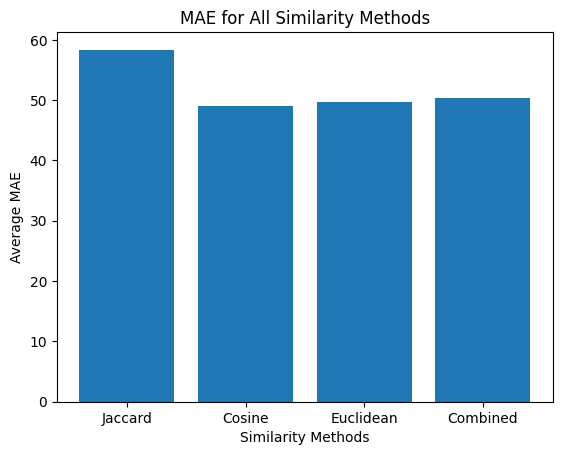

In [ ]:
methods = list(avg_mae_results.keys())
mae_values = list(avg_mae_results.values())

plt.bar(methods, mae_values)
plt.xlabel('Similarity Methods')
plt.ylabel('Average MAE')
plt.title('MAE for All Similarity Methods')
plt.show()


# Tool

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

def find_similar_players(player_name):
    if player_name in cosine_sim_df.index:
        similarities = cosine_sim_df.loc[player_name].sort_values(ascending=False)
        most_similar = similarities[1:6]
        return most_similar
    else:
        return pd.Series()

def get_combine_performance(player_name):
    if player_name in combine["Player"].values:
        return combine[combine["Player"] == player_name].iloc[0]
    else:
        return None

def estimate_nfl_performance(similar_players):
    if not similar_players.empty:
        matched_players = avg_performance[avg_performance["player_name"].isin(similar_players.index)]

        if matched_players.empty:
            return None

        similar_nfl_metrics = matched_players[relevant_metrics]

        similarity_scores = similar_players.values
        weighted_performance = (similar_nfl_metrics.T * similarity_scores).T.sum() / similarity_scores.sum()
        return weighted_performance
    else:
        return None


def on_button_click(b):
    player_name = player_input.value
    similar_players = find_similar_players(player_name)
    original_performance = get_combine_performance(player_name)

    if original_performance is not None:
        result_label.value = (
            f"Original Player: {player_name}\n"
            f"40yd: {original_performance['40yd']}s\n"
            f"Vertical: {original_performance['Vertical']}in\n"
            f"Bench: {original_performance['Bench']} reps\n"
            f"Broad Jump: {original_performance['Broad Jump']}in\n"
        )

        similar_results = []
        for player, score in similar_players.items():
            similar_performance = get_combine_performance(player)
            if similar_performance is not None:
                similar_results.append(
                    f"{player} (Cosine Similarity: {score:.2f})"
                )

        if similar_results:
            similar_players_label.value = "\n".join(similar_results)

            estimated_performance = estimate_nfl_performance(similar_players)
            if estimated_performance is not None:
                estimated_perf_str = "\n".join(
                    [f"{metric}: {value:.2f}" for metric, value in estimated_performance.items()]
                )
                performance_label.value = f"Estimated NFL Performance:\n{estimated_perf_str}"
            else:
                performance_label.value = "NFL performance data not available for similar players."
        else:
            similar_players_label.value = "No similar players found."
            performance_label.value = ""
    else:
        result_label.value = "Player not found!"
        similar_players_label.value = ""
        performance_label.value = ""

# Widgets and UI
player_input = widgets.Text(
    value='',
    placeholder='Enter player name',
    description='Player Name:',
    disabled=False
)

search_button = widgets.Button(description="Find Similar Players")
search_button.on_click(on_button_click)

result_label = widgets.Textarea(value="Player Performance: ", disabled=True)
similar_players_label = widgets.Textarea(value="Most Similar Players: ", disabled=True)
performance_label = widgets.Textarea(value="Predicted Performance", disabled=True)

display(player_input, search_button, result_label, similar_players_label, performance_label)

Text(value='', description='Player Name:', placeholder='Enter player name')

Button(description='Find Similar Players', style=ButtonStyle())

Textarea(value='Player Performance: ', disabled=True)

Textarea(value='Most Similar Players: ', disabled=True)

Textarea(value='Predicted Performance', disabled=True)